# **Trends in der Smartphone-Technologie: Eine Analyse technischer Merkmale**
#### Rafaat Choki
#### 18-11-2024

## **Einleitung**

In dieser Analyse untersuchen wir die Entwicklung von Smartphones über die Jahre hinweg und die Zusammenhänge zwischen verschiedenen technischen Merkmalen. Unser Ziel ist es, zu verstehen, wie sich die Spezifikationen von Smartphones verändert haben, um den steigenden Anforderungen der Nutzer gerecht zu werden. Dazu werden wir die Daten bereinigen, explorativ analysieren, Hypothesen testen und statistische Modelle verwenden, um die wichtigsten Trends und Korrelationen in den Smartphone-Daten zu identifizieren.

### Hypothesen

**1. Hypothese:** **Größere Akkukapazität ist mit größeren Displays verbunden.**  

- **Erklärung:** Smartphones mit größeren Displays benötigen mehr Energie, da ein größerer Bildschirm mehr Strom verbraucht. Um eine angemessene Akkulaufzeit zu gewährleisten, sind größere Batterien erforderlich. Diese Beziehung spiegelt die Notwendigkeit wider, den Strombedarf moderner Smartphones mit großformatigen Displays auszugleichen, die eine bessere visuelle und interaktive Benutzererfahrung bieten.

---

**2. Hypothese:** **Smartphones mit besseren Frontkameras bieten auch bessere Hauptkameras.**  

- **Erklärung:** Hersteller, die Wert auf hochwertige Frontkameras legen, statten diese Geräte tendenziell auch mit leistungsstarken Hauptkameras aus, um ein ausgewogenes Kameraerlebnis zu gewährleisten. Diese Korrelation könnte auf die Marktausrichtung moderner Smartphones hindeuten, bei der sowohl Selfie-Funktionen als auch herkömmliche Fotografie für den Nutzer von hoher Priorität sind.

---

**3. Hypothese:** **Smartphones mit besseren Primärkamera verfügen über mehr Speicherplatz.**  

- **Erklärung:** Smartphones mit hochwertigen Primärkamera werden oft mit größeren Speicherkapazitäten ausgestattet, um die größeren Bild- und Videodateien, die durch hochauflösende Kameras entstehen, zu speichern. Geräte, die auf Kameraqualität und Multimedia-Inhalte abzielen, erfordern daher einen erweiterten internen Speicher, um die Nutzererwartungen zu erfüllen.

---

**4. Hypothese:** **Wichtige technische Merkmale wie Speicher, Kameras, Akkukapazität, Display-Auflösung und Bildwiederholrate haben sich in allen Leistungskategorien – Low-End, Mid-Range und High-End – im Laufe der Jahre verbessert, um den steigenden Nutzeranforderungen gerecht zu werden.**  

- **Erklärung:** Die wichtigsten technischen Spezifikationen von Smartphones haben sich unabhängig von der Leistungskategorie kontinuierlich weiterentwickelt. Speichergrößen haben in allen Klassen zugenommen, um die Anforderungen moderner Apps und Inhalte zu erfüllen. Kameras bieten inzwischen auch in Low-End-Geräten eine akzeptable Qualität, während sie in High-End-Geräten Maßstäbe setzen. Display-Technologien und Akkukapazitäten haben sich ebenfalls in jeder Kategorie verbessert, um ein besseres Nutzererlebnis zu bieten. Diese Entwicklung spiegelt die allgemeine technologische Evolution wider und zeigt, dass Fortschritte nicht nur auf Premiumgeräte beschränkt sind, sondern alle Marktsegmente betreffen.

---

**5. Hypothese:** **High-End-Smartphones haben in den letzten Jahren ein langsameres Wachstum gezeigt als Low-End-Smartphones.**  

- **Erklärung:** Der Markt für High-End-Smartphones ist zunehmend gesättigt, da viele High-End-Geräte bereits ein hohes technologisches Niveau erreicht haben. Im Gegensatz dazu zeigt der Low-End-Markt ein schnelleres Wachstum, angetrieben durch die zunehmende Verfügbarkeit erschwinglicher Technologien und den Bedarf, eine größere Zielgruppe in Schwellenländern zu bedienen. Dieser Trend verdeutlicht den Fokus der Hersteller, die unteren Marktsegmente weiter auszubauen und innovative Funktionen auch in preiswerteren Geräten anzubieten.

---

### Vorgehensweise

**Daten und Bibliotheken laden**: Wir importieren die notwendigen Daten und Bibliotheken.

**1. Datenvorbereitung**  
In der **Datenvorbereitung** wurden die Datensätze bereinigt und vereinheitlicht. Irrelevante Spalten wurden entfernt, und `Display_Resolution` wurde in numerische Werte konvertiert, um die Analyse zu erleichtern. Fehlende Werte, beispielsweise in `Display_Refresh_Rate`, wurden durch Medianwerte oder logische Annahmen ersetzt. Unvollständige Einträge und Duplikate wurden entfernt, und die Zeitachse der Geräteveröffentlichung wurde durch Umbenennung von `Release_Date` in `Release_Year` standardisiert. Jahre mit wenigen Geräten wurden ausgeschlossen, um Verzerrungen zu vermeiden.

**2. Explorative Datenanalyse (EDA)**  
In der **EDA** wurden Verteilungen und Trends technischer Merkmale wie Speicher, Kameraauflösung, Akkukapazität und Displaygröße untersucht. Geräte wurden in Kategorien wie Low-End, Mid-Range und High-End eingeteilt, um Unterschiede zwischen den Segmenten zu analysieren. Zudem wurden die Entwicklungen wichtiger Merkmale über die Jahre und deren Zusammenhang mit den Marktanteilen der Hersteller visualisiert, um technologische Fortschritte und Markttrends zu verdeutlichen.

**3. Korrelation der Smartphone-Merkmale**  
Die **Korrelation der Smartphone-Merkmale** zeigte signifikante Zusammenhänge, etwa zwischen Akkukapazität und Displaygröße sowie zwischen Speicher und Kameraleistung. Eine Korrelationsmatrix und Scatterplots visualisierten diese Beziehungen. Multiple lineare Regressionen wurden eingesetzt, um die stärksten Einflussfaktoren für Speicher und andere technische Merkmale zu identifizieren, was die Überprüfung der Hypothesen erleichterte.

## **Hauptteil**

### Daten und Bibliotheken laden

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
import itertools
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("D:/Programming Projects/HTW-Notes/Semester 4/Ki werkstatt/phones_analysis/data/smartphones.csv")

### 1. Datenvorbereitung

**1.1. Allgemeine Informationen zu den Daten anzeigen:**
    
   - **Grund:** Bevor wir mit der eigentlichen Datenanalyse beginnen, ist es wichtig, einen Überblick über die Struktur und den Inhalt unserer Daten zu erhalten. Dies hilft uns, mögliche Probleme wie fehlende Werte, falsche Datentypen oder unvollständige Einträge zu erkennen und diese entsprechend zu behandeln.

   - **Beobachtung:** Die Daten beinhalten eine Vielzahl von technischen Spezifikationen für Smartphones. Einige Spalten enthalten fehlende Werte (z.B. `Processor`, `Front_Camera`, `Display_Refresh_Rate`), was darauf hindeutet, dass bestimmte Geräte in diesen Bereichen keine Angaben haben oder die Information nicht erfasst wurde. Zudem sind einige Spalten als Zeichenketten (Strings) formatiert, obwohl sie numerische Werte enthalten sollten (z.B. `Display_Resolution`), was zu potenziellen Schwierigkeiten bei der Analyse führen kann.
    
   - **Code:**

In [29]:
# Allgemeine Informationen zu den Daten anzeigen
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 1872 non-null   object 
 1   Model                 1872 non-null   object 
 2   OS                    1867 non-null   object 
 3   Release_Date          1872 non-null   int64  
 4   Battery               1872 non-null   float64
 5   Processor             1667 non-null   object 
 6   Memory                1872 non-null   float64
 7   Primary_Storage       1872 non-null   float64
 8   External_Storage      1872 non-null   object 
 9   Display_Size          1872 non-null   float64
 10  Display_Resolution    1869 non-null   object 
 11  Display_Refresh_Rate  287 non-null    float64
 12  Primary_Camera        1872 non-null   float64
 13  Front_Camera          1739 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 204.9+ KB


,Release_Date,Battery,Memory,Primary_Storage,Display_Size,Display_Refresh_Rate,Primary_Camera,Front_Camera
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,287.000000,1872.000000,1739.000000
mean,2016.535791,3087.171474,3.129407,56.479167,5.415224,96.763066,19.023504,8.543358
std,3.140705,1169.185539,2.627185,73.158246,0.952455,27.976757,20.335021,8.392810
min,2007.000000,800.000000,0.100000,1.000000,2.500000,60.000000,1.000000,0.300000
25%,2015.000000,2065.000000,1.000000,8.000000,5.000000,60.000000,8.000000,2.000000
50%,2016.000000,3000.000000,2.000000,32.000000,5.500000,90.000000,13.000000,5.000000
75%,2019.000000,4000.000000,4.000000,64.000000,6.300000,120.000000,16.000000,13.000000
max,2022.000000,8380.000000,18.000000,512.000000,8.300000,165.000000,108.000000,60.000000


In [30]:
# Daten nach erscheinungsdatum sortieren
data_sorted = data.sort_values(by='Release_Date', ascending=False)

# Ein kurzer Blick auf die ersten Zeilen der Daten
data_sorted.head()

,Brand,Model,OS,Release_Date,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Display_Refresh_Rate,Primary_Camera,Front_Camera
253,Blackview,A50,Android,2022,4280.0,Unisoc,3.0,64.0,microSDXC,6.0,720 x 1560,NaN,13.0,5.0
1599,Xiaomi,12 Lite,Android,2022,4300.0,Qualcomm,6.0,128.0,not expandable,6.5,2400 x 1080,120.0,108.0,32.0
1248,Samsung,Galaxy A33 5G,Android,2022,5000.0,Samsung,6.0,128.0,microSDXC,6.4,2400 x 1080,90.0,48.0,13.0
937,Motorola,Moto G Stylus 5G (2022),Android,2022,5000.0,Qualcomm,4.0,128.0,microSDXC,6.8,2460 x 1080,120.0,50.0,16.0
1261,Samsung,Galaxy A53 5G,Android,2022,5000.0,Samsung,6.0,128.0,microSDXC,6.5,2400 x 1080,120.0,64.0,32.0


In [31]:
# Ein kurzer Blick auf die letzen Zeilen der Daten
data_sorted.tail()

,Brand,Model,OS,Release_Date,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Display_Refresh_Rate,Primary_Camera,Front_Camera
1083,Nokia,N96 US,Symbian,2008,950.0,NaN,0.1,16.0,microSDHC,2.8,320 x 240,NaN,5.0,NaN
245,BlackBerry,Storm 9500,BlackBerry,2008,1400.0,NaN,0.1,1.0,microSDHC,3.2,480 x 360,NaN,3.0,NaN
246,BlackBerry,Storm 9530,BlackBerry,2008,1400.0,NaN,0.1,1.0,microSDHC,3.2,480 x 360,NaN,3.0,NaN
388,HTC,MAX 4G,Windows,2008,1500.0,Qualcomm,0.3,8.0,microSDHC,3.8,800 x 480,NaN,3.0,NaN
99,Apple,iPhone,iOS,2007,1400.0,NaN,0.1,16.0,,3.5,480 x 320,NaN,2.0,NaN


**1.2. Analyse der Spalten und Entfernen irrelevanter Spalten**

  - **Grund:** Bevor wir mit der eigentlichen Analyse fortfahren, ist es wichtig, die verschiedenen Spalten zu überprüfen und zu entscheiden, ob sie für die Analyse notwendig sind. Einige Spalten, die wenig bis keine Variation in den Daten aufweisen oder für die Analyse irrelevant sind, können entfernt werden, um den Datensatz zu optimieren und die Analyse zu vereinfachen.
  
  - **Beobachtung:** Die Spalte `External_Storage` wird für die Analyse irrelevant sein. Es gibt auch doppelte Einträge für "not expandable" sowie leere Werte (7,8%).

  - **Code:**

In [32]:
# Prozentsatz der verschiedenen Werte in der Spalte 'External_Storage'
external_storage_unique_percentage = data['External_Storage'].value_counts(normalize=True) * 100

# Ausgabe der verschiedenen Werte und deren Prozentsatz
print("Prozentuale Verteilung der verschiedenen Werte in 'External_Storage':")
print(external_storage_unique_percentage)

# Wenn die Spalte irrelevant ist, löschen wir sie
data = data.drop(columns=['External_Storage'])

# Überprüfen, ob die Spalte 'External_Storage' noch existiert
print(f"Existiert die Spalte 'External_Storage' noch? {'External_Storage' in data.columns}")

Prozentuale Verteilung der verschiedenen Werte in 'External_Storage':
External_Storage
microSDXC           51.816239
microSDHC           27.350427
not expandable      10.416667
                     7.799145
microSD              1.442308
Nano Memory (NM)     1.068376
not expandable       0.106838
Name: proportion, dtype: float64
Existiert die Spalte 'External_Storage' noch? False


**1.3. Umwandlung der Display-Auflösung in numerische Werte**

  - **Grund:** Um die Hypothese zu überprüfen, dass Smartphones mit höherer Display-Auflösung auch eine höhere Bildwiederholrate (Display_Refresh_Rate) bieten, müssen wir die `Display_Resolution`-Daten in eine numerische Form bringen. Die aktuelle Darstellung der Auflösung als Zeichenkette (z. B. "1280 x 720") hindert uns daran, eine statistische Analyse durchzuführen. Durch das Aufteilen der Auflösung in Breite und Höhe sowie der Berechnung der Gesamtauflösung können wir die Daten numerisch auswerten und die Hypothese validieren.

  - **Code:**

In [33]:
# Schritt 1: Display_Resolution aufteilen in Breite und Höhe
data[['Resolution_Width', 'Resolution_Height']] = data['Display_Resolution'].str.split(' x ', expand=True)

# Schritt 2: Umwandlung in numerische Werte
data['Resolution_Width'] = pd.to_numeric(data['Resolution_Width'], errors='coerce')
data['Resolution_Height'] = pd.to_numeric(data['Resolution_Height'], errors='coerce')

# Schritt 3: Berechnung der Gesamtauflösung
data['Total_Resolution'] = data['Resolution_Width'] * data['Resolution_Height']

# Überprüfen der ersten Zeilen
data[['Display_Resolution', 'Resolution_Width', 'Resolution_Height', 'Total_Resolution']].head()

,Display_Resolution,Resolution_Width,Resolution_Height,Total_Resolution
0,854 x 480,854.0,480.0,409920.0
1,1280 x 720,1280.0,720.0,921600.0
2,1920 x 1080,1920.0,1080.0,2073600.0
3,1280 x 720,1280.0,720.0,921600.0
4,1280 x 720,1280.0,720.0,921600.0


**1.4. Vereinheitlichung und Analyse fehlender Werte**

  - **Grund:** Um eine konsistente und genaue Analyse zu gewährleisten, sollten alle fehlenden Werte im Datensatz einheitlich als `NULL` dargestellt werden. In unserem Fall können fehlende Werte durch verschiedene Platzhalter wie leere Zeichenfolgen (`''`), spezielle Werte (`NaN`) oder ungenutzte Platzhalter wie `not available` gekennzeichnet sein. Durch die Umwandlung aller dieser Werte in `NULL` wird die Behandlung fehlender Daten standardisiert und vereinfacht. Anschließend zählen wir die fehlenden Werte in jeder Spalte, um die Datenqualität und potenzielle Lücken im Datensatz zu evaluieren.

  - **Beobachtung:** Die Umwandlung aller fehlenden Werte zu `NULL` zeigt, dass die Spalten `Display_Refresh_Rate` und `Processor` eine hohe Anzahl fehlender Werte aufweisen. Die Spalte `Display_Refresh_Rate` hat 1585 fehlende Einträge, was etwa 85% der Gesamtzahl entspricht, und `Processor` hat 205 fehlende Einträge, etwa 11% des Datensatzes. Die übrigen fehlenden Werte verteilen sich auf `OS`, `Display_Resolution`, `Front_Camera`, `Resolution_Width`, `Resolution_Height` und `Total_Resolution`, wobei der Anteil der fehlenden Werte in diesen Spalten im Vergleich gering ist. 

  - **Code:**

In [34]:
# Schritt 1: Alle Variationen fehlender Werte zu `NaN` umwandeln
data = data.replace(['', 'Missing value', 'not available', 'NA', 'N/A'], pd.NA)

# Schritt 2: Anzahl der fehlenden Werte in jeder Spalte berechnen
missing_counts = data.isna().sum()

# Schritt 3: Visualisierung der fehlenden Werte
missing_counts

Brand                      0
Model                      0
OS                         5
Release_Date               0
Battery                    0
Processor                205
Memory                     0
Primary_Storage            0
Display_Size               0
Display_Resolution         3
Display_Refresh_Rate    1585
Primary_Camera             0
Front_Camera             133
Resolution_Width           3
Resolution_Height          3
Total_Resolution           3
dtype: int64

**1.5. Entfernung unvollständiger Einträge (Geräte ohne OS oder Display_Resolution)**

  - **Grund:** Um sicherzustellen, dass die analysierten Daten vollständig sind und um die Validität der Analysen zu verbessern, entfernen wir alle Geräte, denen entweder das Betriebssystem (`OS`) oder die Display-Auflösung (`Display_Resolution`) fehlt. Da diese beiden Merkmale essenziell für die folgenden Analysen sind, sind diese Einträge für unsere Zwecke nicht hilfreich und könnten die Analyseergebnisse verfälschen.

  - **Code:**

In [35]:
# Anzahl der Geräte vor der Entfernung
initial_row_count = data.shape[0]

# Geräte ohne OS oder Display_Resolution entfernen
data = data.dropna(subset=['OS', 'Display_Resolution'])

# Anzahl der Geräte nach der Entfernung
final_row_count = data.shape[0]

# Anzahl der entfernten Geräte
removed_devices_count = initial_row_count - final_row_count

print(f"Anzahl der entfernten Geräte: {removed_devices_count}")


Anzahl der entfernten Geräte: 8


**1.6. Behandlung fehlender Display-Refresh-Rate-Werte**

  - **Grund:** Die Bildwiederholrate (`Display_Refresh_Rate`) ist ein wichtiger Faktor für die Bewertung der Bildschirmqualität, jedoch fehlt dieser Wert für viele Geräte in unserem Datensatz. Da 60Hz als Standard-Bildwiederholrate für ältere Smartphones (wie das erste iPhone) weit verbreitet ist, könnten wir fehlende Werte sinnvollerweise auf 60Hz setzen, anstatt die Einträge zu löschen. Dies sorgt für Konsistenz und ermöglicht die Einbeziehung dieser Geräte in Analysen, ohne sie fälschlicherweise als High-Refresh-Rate-Geräte zu klassifizieren.

  - **Code:**

In [36]:
# Create a copy of the original dataset for cleaned data
cleaned_data = data.copy()

# Fill missing values in 'Display_Refresh_Rate' with 60Hz
cleaned_data['Display_Refresh_Rate'] = cleaned_data['Display_Refresh_Rate'].fillna(60)

# Verify if all missing values in 'Display_Refresh_Rate' are filled
missing_counts_after_fill = cleaned_data.isna().sum()
missing_counts_after_fill

Brand                     0
Model                     0
OS                        0
Release_Date              0
Battery                   0
Processor               203
Memory                    0
Primary_Storage           0
Display_Size              0
Display_Resolution        0
Display_Refresh_Rate      0
Primary_Camera            0
Front_Camera            132
Resolution_Width          0
Resolution_Height         0
Total_Resolution          0
dtype: int64

**1.7. Duplikaterkennung und -entfernung**

  - **Grund:** Das Vorhandensein von Duplikaten in den Daten kann die Analyse verfälschen und zu ungenauen Ergebnissen führen. Durch das Entfernen doppelter Einträge können wir sicherstellen, dass jedes Gerät in der Analyse nur einmal vertreten ist.

  - **Beobachtung:** Es wurden keine doppelten Einträge in den Daten gefunden. Das bedeutet, dass jedes Gerät in den Daten einzigartig ist und keine redundanten Einträge vorhanden sind. Damit können wir sicher sein, dass die Analyse auf einer konsistenten und nicht duplizierten Datengrundlage basiert.

  - **Code:**

In [37]:
# Überblick über die Anzahl an Duplikaten in cleaned_data
duplicate_count = cleaned_data.duplicated().sum()
print(f'Anzahl der Duplikate: {duplicate_count}')

Anzahl der Duplikate: 0


**1.8. Anzahl der Handys pro Jahr und Entfernung des Jahres mit niedriger Anzahl**

  - **Grund:** Es ist wichtig zu sehen, wie viele Geräte pro Jahr in den Daten enthalten sind, um die Repräsentativität der Daten im Zeitverlauf zu prüfen. Einige Jahre könnten eine niedrige Anzahl an Geräten aufweisen, was die Analyse verzerren könnte.

  - **Beobachtung:** Im Jahr 2007 wurde nur ein einziges Handy veröffentlicht, was nicht repräsentativ für die Entwicklung der Jahre danach ist. Da der Datensatz nicht alle Handys umfasst, sondern nur eine Auswahl, wurde 2007 entfernt, um eine aussagekräftigere Analyse auf Basis der Jahre mit mehr Geräten vorzunehmen.

  - **Code:**

In [38]:
# Anzahl der Handys pro Jahr ermitteln
handy_counts_per_year = cleaned_data['Release_Date'].value_counts().sort_index()

# Ausgabe der Anzahl der Handys pro Jahr in der Konsole
print("Anzahl der Handys pro Jahr:")
print(handy_counts_per_year)

# Entfernen des Jahres 2007 aus den Daten
cleaned_data = cleaned_data[cleaned_data['Release_Date'] != 2007]

# Überprüfen, ob das Jahr 2007 noch in den Daten vorhanden ist
print()
print(f"Existiert das Jahr 2007 noch in den Daten? {2007 in cleaned_data['Release_Date'].unique()}")

Anzahl der Handys pro Jahr:
Release_Date
2007      1
2008     10
2009     15
2010     30
2011     70
2012     75
2013     91
2014    147
2015    333
2016    188
2017    172
2018    153
2019    178
2020    180
2021    139
2022     82
Name: count, dtype: int64

Existiert das Jahr 2007 noch in den Daten? False


**1.9. Umbenennung der Spalte "Release_Date" in "Release_Year"**

  - **Grund:** Der Name "Release_Date" deutet auf ein Datum hin, während in den Daten nur das Jahr des Release angegeben ist. Um Missverständnisse zu vermeiden und die Benennung konsistenter zu gestalten, wird die Spalte in "Release_Year" umbenannt, was genauer den Inhalt der Spalte widerspiegelt.

  - **Code:**

In [39]:
# Umbenennen der Spalte 'Release_Date' in 'Release_Year'
cleaned_data = cleaned_data.rename(columns={'Release_Date': 'Release_Year'})

# Überprüfen der Spaltennamen nach der Umbenennung
print("Spaltennamen nach der Umbenennung:")
print(cleaned_data.columns)

Spaltennamen nach der Umbenennung:
Index(['Brand', 'Model', 'OS', 'Release_Year', 'Battery', 'Processor',
       'Memory', 'Primary_Storage', 'Display_Size', 'Display_Resolution',
       'Display_Refresh_Rate', 'Primary_Camera', 'Front_Camera',
       'Resolution_Width', 'Resolution_Height', 'Total_Resolution'],
      dtype='object')


### 2. Explorative Datenanalyse (EDA)

**2.1. Untersuchung der Verteilung wichtiger Kategorien**

  - **Grund:** Um die Verteilung der wichtigsten Kategorien wie `Brand`, `OS`, `Processor` und `Display_Resolution` besser zu verstehen, erstellen wir Balkendiagramme für diese Spalten. Dies ermöglicht uns, die Häufigkeit der verschiedenen Werte in jeder Kategorie visuell darzustellen und potenzielle Muster oder Ungleichgewichte zu erkennen.

  - **Beobachtung:**
    1. `Marken (Brand):` Samsung dominiert den Datensatz, gefolgt von Motorola und Xiaomi, während Apple nur auf Platz 17 liegt. Durch die Visualisierung der Top 90% der Marken werden weniger vertretene Marken (z. B. mit weniger als 4 Geräten) ausgeblendet, sodass die dominierenden Marken besser hervorgehoben werden.

    2. `Betriebssysteme (OS):` Android ist mit etwa 95% klar führend, während Windows doppelt so viele Geräte wie iOS repräsentiert. Die geringe Anzahl an iOS-Geräten ist auffällig.
          
    3. `Prozessoren (Processor):` Qualcomm ist mit über doppelt so vielen Geräten wie der zweitplatzierte MediaTek deutlich dominant, was wenig überraschend ist, da Apple-Produkte weniger vertreten sind.
      
    4. `Display-Auflösungen (Display_Resolution):` Die Auflösungen 1280 x 720 und 1920 x 1080 sind am häufigsten und typisch für Mittelklasse- und ältere Geräte. Höhere Auflösungen wie 2560 x 1440 sind seltener und hauptsächlich in Premium-Modellen zu finden. Auch hier wurden die Top 90% der Auflösungen visualisiert, um die gängigsten besser darzustellen.

  - **Code:**

C:\Users\rafaa\AppData\Local\Temp\ipykernel_11484\909050275.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Brand', data=brand_data, order=brand_data['Brand'].value_counts().index,
C:\Users\rafaa\AppData\Local\Temp\ipykernel_11484\909050275.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='OS', data=cleaned_data, order=cleaned_data['OS'].value_counts().index,
C:\Users\rafaa\AppData\Local\Temp\ipykernel_11484\909050275.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Processor', data=cleaned_data, order=cleaned_data

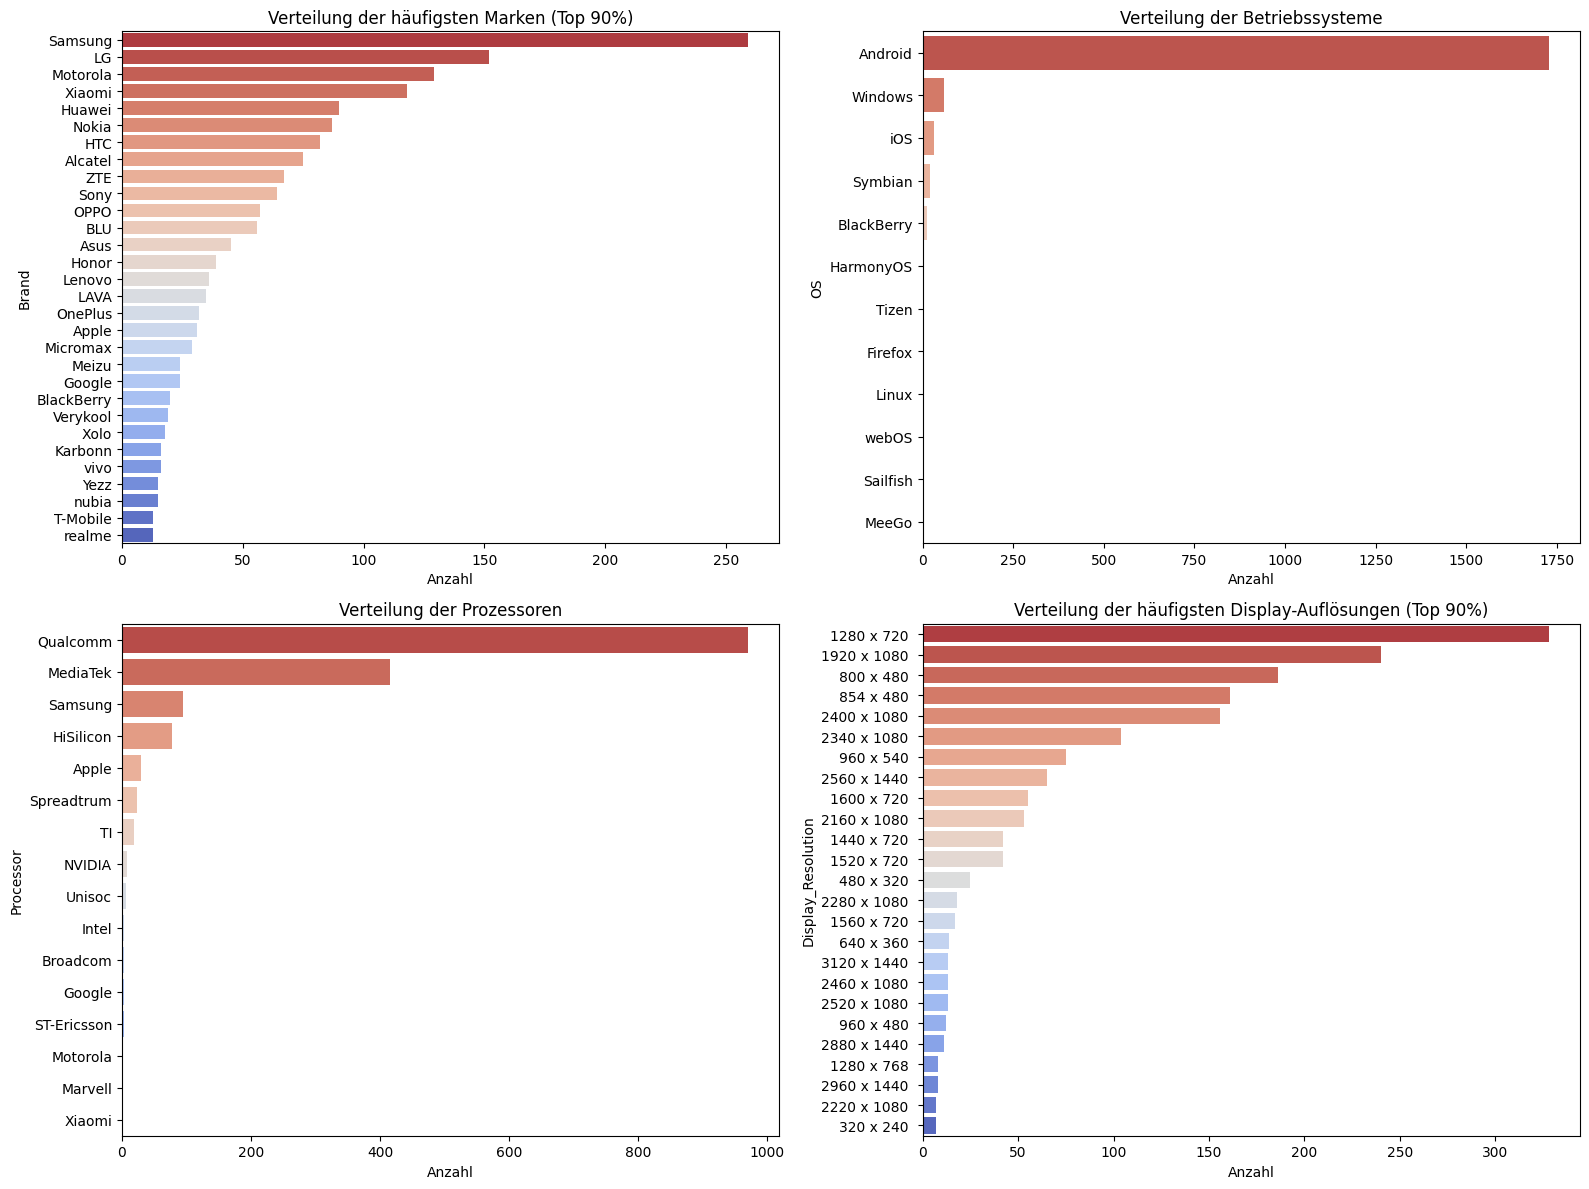

In [40]:
# Funktion zur Filterung der höchsten 90% basierend auf den Häufigkeiten
def filter_top_90_percent(data, column):
    value_counts = data[column].value_counts(normalize=True).cumsum()
    top_90_percent_values = value_counts[value_counts <= 0.9].index
    return data[data[column].isin(top_90_percent_values)]

# Festlegen des Diagramm-Layouts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Verteilung der Marken (Brand) - Top 90%
brand_data = filter_top_90_percent(cleaned_data, 'Brand')
sns.countplot(y='Brand', data=brand_data, order=brand_data['Brand'].value_counts().index, 
              ax=axes[0, 0], palette='coolwarm_r')
axes[0, 0].set_title('Verteilung der häufigsten Marken (Top 90%)')
axes[0, 0].set_xlabel('Anzahl')
axes[0, 0].set_ylabel('Brand')

# Verteilung der Betriebssysteme (OS)
sns.countplot(y='OS', data=cleaned_data, order=cleaned_data['OS'].value_counts().index, 
              ax=axes[0, 1], palette='coolwarm_r')
axes[0, 1].set_title('Verteilung der Betriebssysteme')
axes[0, 1].set_xlabel('Anzahl')
axes[0, 1].set_ylabel('OS')

# Verteilung der Prozessoren (Processor)
sns.countplot(y='Processor', data=cleaned_data, order=cleaned_data['Processor'].value_counts().index, 
              ax=axes[1, 0], palette='coolwarm_r')
axes[1, 0].set_title('Verteilung der Prozessoren')
axes[1, 0].set_xlabel('Anzahl')
axes[1, 0].set_ylabel('Processor')

# Verteilung der Display-Auflösungen (Display_Resolution) - Top 90%
resolution_data = filter_top_90_percent(cleaned_data, 'Display_Resolution')
sns.countplot(y='Display_Resolution', data=resolution_data, order=resolution_data['Display_Resolution'].value_counts().index, 
              ax=axes[1, 1], palette='coolwarm_r')
axes[1, 1].set_title('Verteilung der häufigsten Display-Auflösungen (Top 90%)')
axes[1, 1].set_xlabel('Anzahl')
axes[1, 1].set_ylabel('Display_Resolution')

# Layout-Anpassung für bessere Lesbarkeit
plt.tight_layout()
plt.show()

**2.2. Analyse der Verteilung wichtiger technischer Merkmale**

  - **Grund:** Um ein besseres Verständnis für die Verteilung und mögliche Ausreißer der verschiedenen technischen Merkmale wie `Battery`, `Memory`, `Primary_Storage`, `Display_Size`, `Display_Refresh_Rate`, `Primary_Camera`, `Front_Camera` und `Total_Resolution` zu erhalten, werden Boxplots und Histogramme erstellt. Diese Visualisierungen helfen uns, die zentrale Tendenz, Streuung und Ausreißer dieser Merkmale zu erkennen, sodass wir die Daten besser interpretieren und fundierte Entscheidungen treffen können.

  - **Beobachtungen:**  
  
    1. `Battery` zeigt eine breite Verteilung der Kapazitäten, mit einem erheblichen Bereich von Werten (800 mAh bis 8380 mAh) und einigen Ausreißern, was auf sehr unterschiedliche Akkugrößen hinweist. Besonders auffällig sind die 5 Ausreißer.
  
    2. `Memory` variiert von 0.1 GB bis 18 GB, mit einem Median von 2 GB, was auf eine breite Palette an Geräten mit unterschiedlichen Speicherkapazitäten hinweist. Es gibt 39 Ausreißer in den Daten.

    3. `Primary_Storage` hat einen Median von 32 GB, aber die Spanne reicht bis 512 GB, was eine große Vielfalt an Speichergrößen zeigt. Besonders auffällig sind die 94 Ausreißer, die auf Geräte mit außergewöhnlich hohen Speicherkapazitäten hinweisen.

    4. `Display_Size` variiert mit einem Median von 5,5 Zoll, wobei größere Displays seltener sind. Die 12 Ausreißer deuten auf besonders kleine oder große Displays hin.

    5. `Display_Refresh_Rate` zeigt eine hohe Konzentration von Geräten mit einer Refresh-Rate von 60 Hz, wobei die Ausreißer bis zu 165 Hz reichen. Mit 207 Ausreißern sehen wir eine große Bandbreite an unterschiedlichen Display-Refresh-Raten.

    6. `Primary_Camera` zeigt eine breite Streuung der Kamerauflösungen, mit einem Median von 13 MP und einem Maximalwert von 108 MP. Hier gibt es eine hohe Anzahl an Ausreißern (346), was auf eine große Variation in den Kamerasystemen hinweist.

    7. `Front_Camera` hat einen Median von 5 MP, mit einer breiten Verteilung von 0,3 MP bis 60 MP. Auch hier gibt es 102 Ausreißer, die eine große Spannweite an Frontkameras zeigen.

    8. `Total_Resolution` (Gesamtauflösung) variiert von 76800 bis 8294400 Pixel, mit einem Median von 1.094.400 Pixel. Mit 9 Ausreißern, die auf Geräte mit besonders hoher Gesamtauflösung hinweisen, zeigt sich eine starke Variabilität.

  - **Code:**  

Anzahl der Ausreißer für Battery: 5
Anzahl der Ausreißer für Memory: 39
Anzahl der Ausreißer für Primary_Storage: 94
Anzahl der Ausreißer für Display_Size: 12
Anzahl der Ausreißer für Display_Refresh_Rate: 207
Anzahl der Ausreißer für Primary_Camera: 346
Anzahl der Ausreißer für Front_Camera: 102
Anzahl der Ausreißer für Total_Resolution: 9


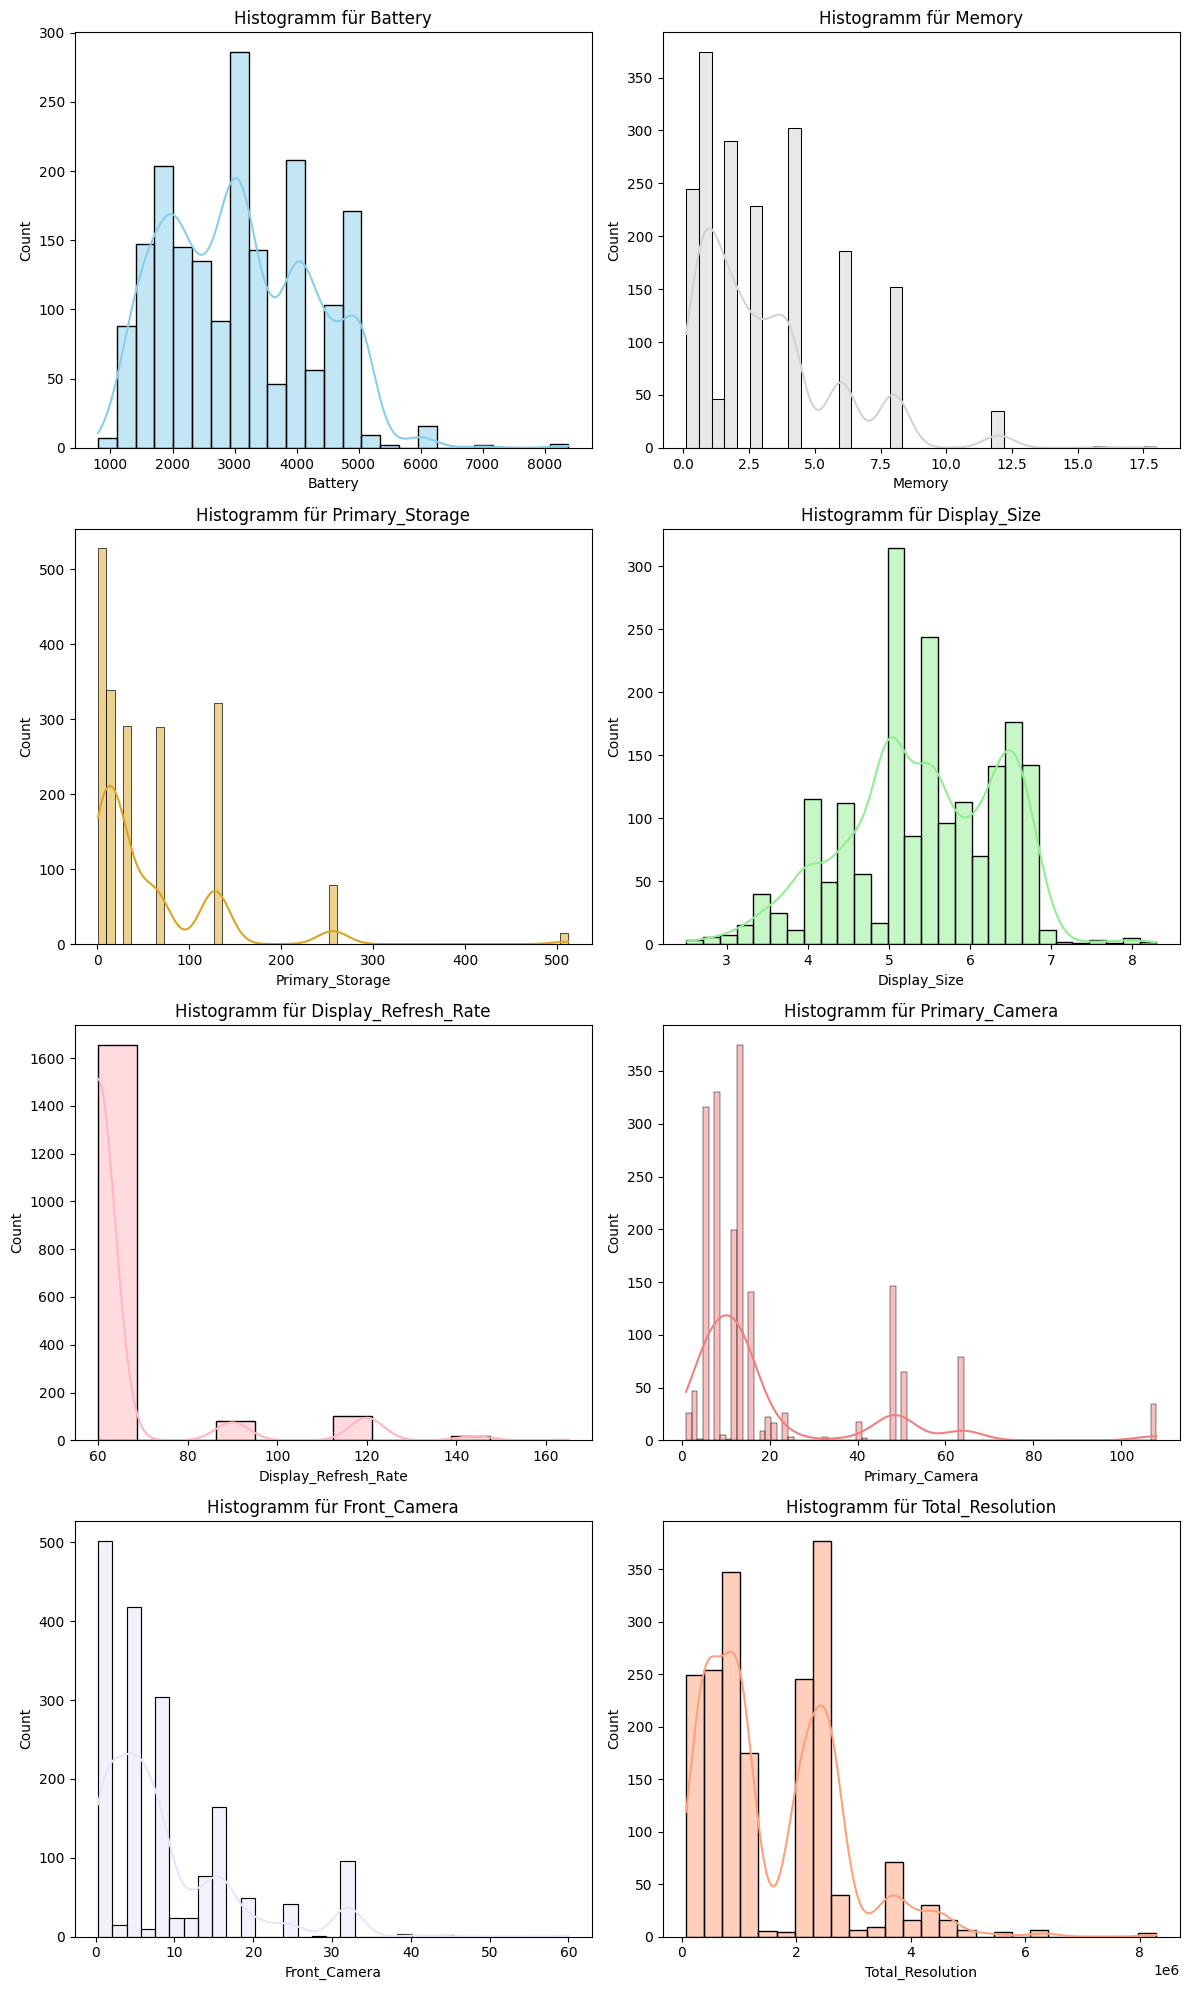

Anzahl der Ausreißer für Battery: 5
Anzahl der Ausreißer für Memory: 39
Anzahl der Ausreißer für Primary_Storage: 94
Anzahl der Ausreißer für Display_Size: 12
Anzahl der Ausreißer für Display_Refresh_Rate: 207
Anzahl der Ausreißer für Primary_Camera: 346
Anzahl der Ausreißer für Front_Camera: 102
Anzahl der Ausreißer für Total_Resolution: 9


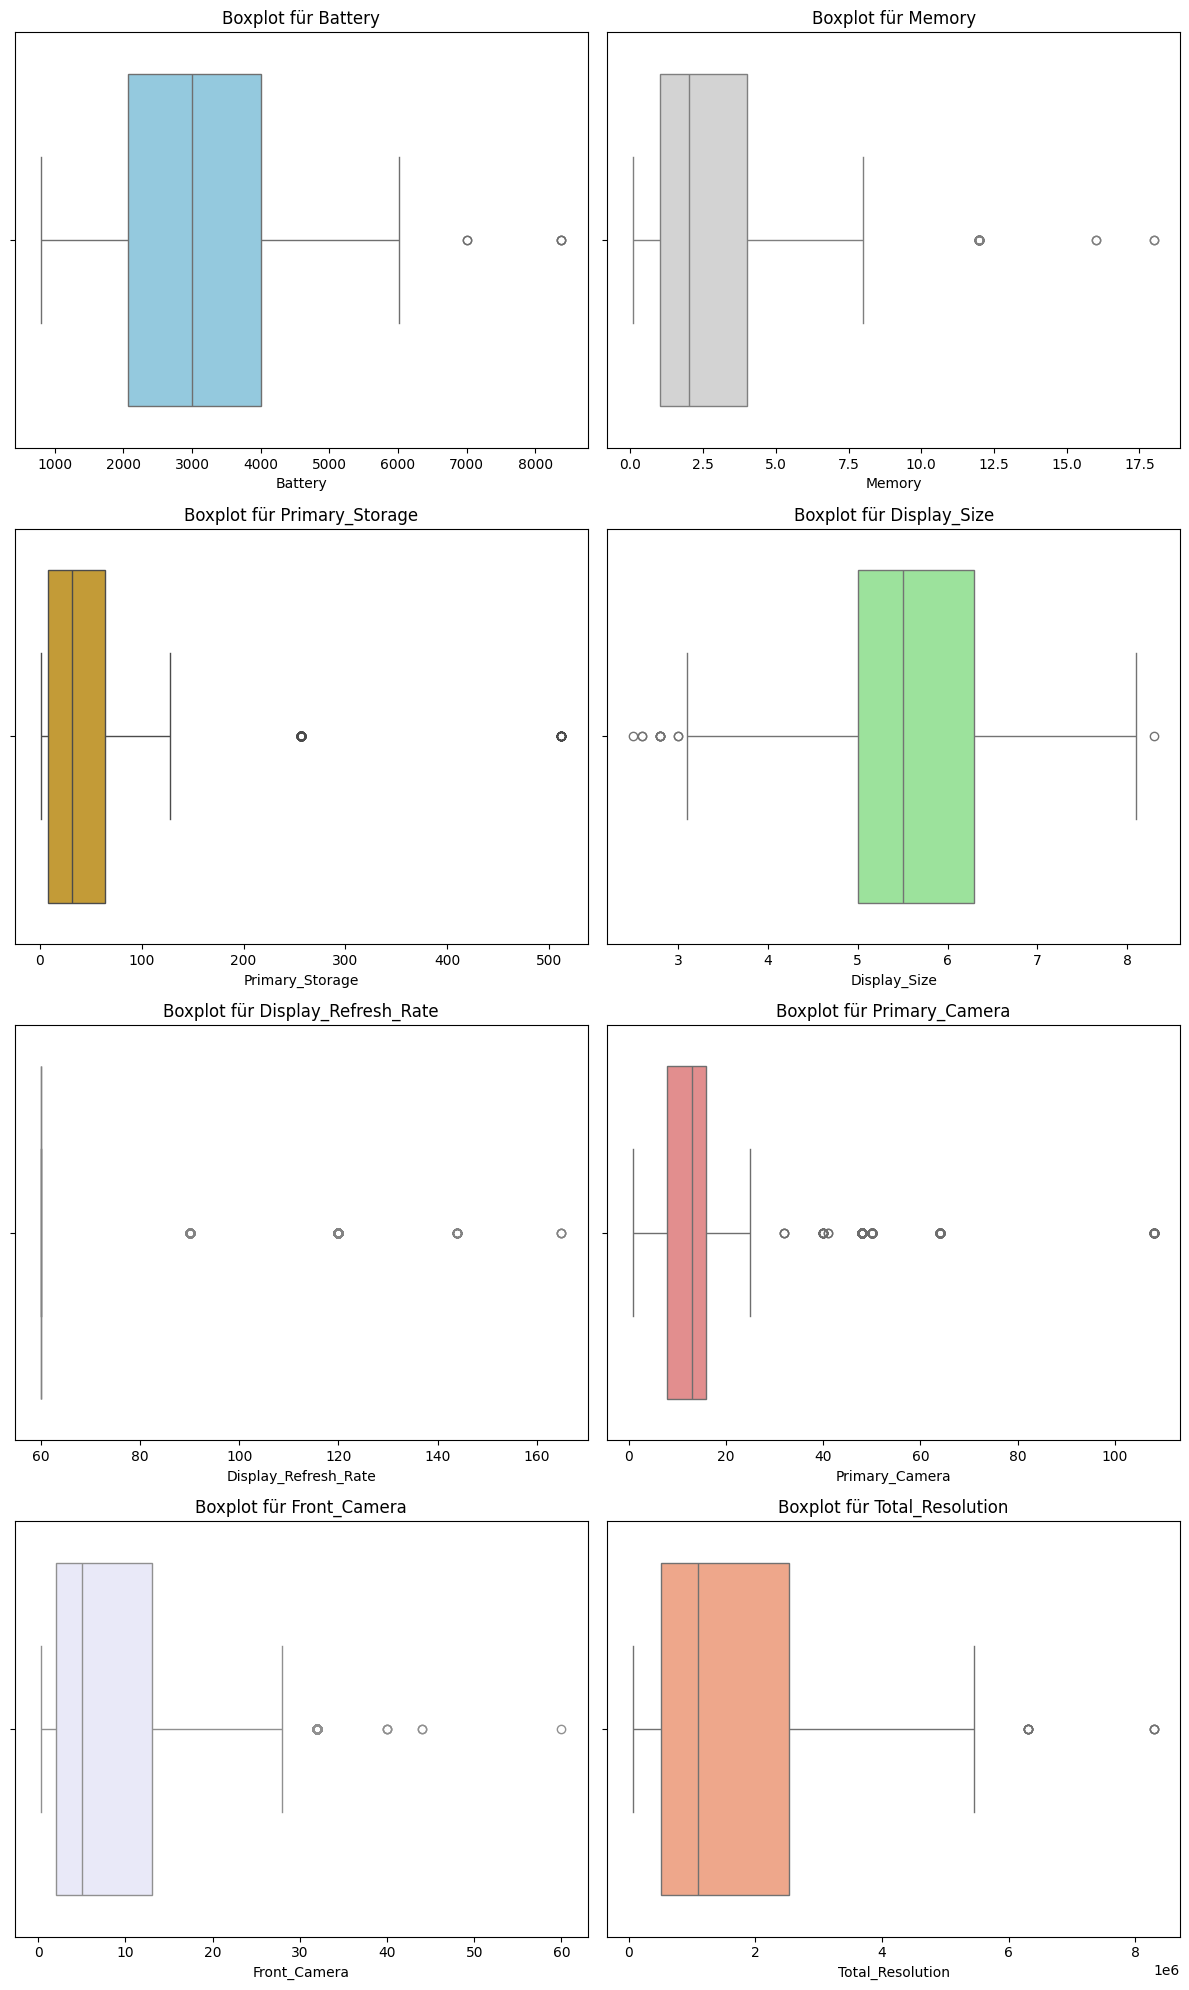

In [41]:
# Liste von Farben
colors = ["skyblue", "lightgray", "goldenrod", "lightgreen", "lightpink", "lightcoral", "lavender", "lightsalmon"]

columns = ['Battery', 'Memory', 'Primary_Storage', 'Display_Size', 
            'Display_Refresh_Rate', 'Primary_Camera', 'Front_Camera', 'Total_Resolution']

# Funktion zur Berechnung der Ausreißer
def count_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)].shape[0]

# 1. Setze das Diagramm-Layout für Histogramme: 2x4 Grid (2 Spalten und 4 Zeilen)
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Histogramme für die 8 Merkmale erstellen
for i, column in enumerate(columns):
    row = i // 2  # Bestimme die Zeile (0 bis 3)
    col = i % 2   # Bestimme die Spalte (0 oder 1)
    sns.histplot(cleaned_data[column], ax=axes[row, col], kde=True, color=colors[i])  # Farbe aus der Liste
    axes[row, col].set_title(f'Histogramm für {column}')
    axes[row, col].set_xlabel(column)
    
    # Berechne und drucke die Anzahl der Ausreißer für das aktuelle Feature
    outliers_count = count_outliers(cleaned_data[column])
    print(f'Anzahl der Ausreißer für {column}: {outliers_count}')

# Layout-Anpassung für bessere Lesbarkeit
plt.tight_layout()
plt.show()

# 2. Setze das Diagramm-Layout für Boxplots: 2x4 Grid (2 Spalten und 4 Zeilen)
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Boxplots für die 8 Merkmale erstellen
for i, column in enumerate(columns):
    row = i // 2  # Bestimme die Zeile (0 bis 3)
    col = i % 2   # Bestimme die Spalte (0 oder 1)
    sns.boxplot(x=cleaned_data[column], ax=axes[row, col], color=colors[i])  # Farbe aus der Liste
    axes[row, col].set_title(f'Boxplot für {column}')
    axes[row, col].set_xlabel(column)
    
    # Berechne und drucke die Anzahl der Ausreißer für das aktuelle Feature
    outliers_count = count_outliers(cleaned_data[column])
    print(f'Anzahl der Ausreißer für {column}: {outliers_count}')

# Layout-Anpassung für bessere Lesbarkeit
plt.tight_layout()
plt.show()

**2.3. Diskretisierung der Geräte in Kategorien basierend auf Hardware-Daten**

  - **Grund:** Die Einteilung der Geräte in Kategorien (`low_end`, `medium_end`, `high_end`) anhand wesentlicher technischer Merkmale wie `Battery`, `Memory`, `Primary_Storage`, und `Total_Resolution` ermöglicht eine strukturierte Analyse. So können wir besser zwischen verschiedenen Leistungsklassen unterscheiden und eine fundierte Einschätzung der Gerätequalität treffen. Diese Segmentierung schafft zudem eine Grundlage für die spätere Analyse der Verteilung innerhalb bestimmter Marken und Preissegmente.

  - **Beobachtungen:**
    1. Die Verteilung der Geräte in die Kategorien zeigt, dass ein Großteil der Geräte in die `low_end` Kategorie fällt, nämlich `41,79%`. Dies deutet darauf hin, dass viele Geräte auf Basis dieser Hardware-Merkmale eine vergleichsweise einfache Ausstattung haben.
    
    2.  Die `medium_end` Kategorie umfasst `32,99%` der Geräte. Dies spiegelt eine mittlere Ausstattung wider, die häufig bei Mittelklasse-Geräten zu finden ist.
    
    3. Geräte der `high_end` Kategorie machen `25,21%` aus. Diese Geräte bieten die besten Hardware-Spezifikationen und gehören zur oberen Leistungsklasse.
  
  - **Code:**

In [42]:
# Beispiel für Merkmale
hardware_features = ['Battery', 'Memory', 'Primary_Storage', 'Display_Size',
                     'Display_Refresh_Rate', 'Primary_Camera', 'Front_Camera', 'Total_Resolution']

# Funktion zur Berechnung der Quantile und Kategorisierung
def categorize_devices(df, features):
    # Kopie der Daten erstellen
    categorized_data = df.copy()
    
    # Diskretisierung jedes Merkmals
    for feature in features:
        # Berechnung der Quantile für low, medium und high
        q_low = df[feature].quantile(0.33)
        q_medium = df[feature].quantile(0.66)
        q_high = df[feature].quantile(1.0)
        
        # Überprüfen, ob die Quantile unterschiedlich sind
        if q_low != q_medium and q_low != q_high and q_medium != q_high:
            # Hinzufügen der Kategorisierungsspalte, mit 'duplicates' auf 'drop' gesetzt
            categorized_data[feature + '_category'] = pd.cut(
                df[feature], 
                bins=[-float('inf'), q_low, q_medium, float('inf')], 
                labels=['low_end', 'medium_end', 'high_end'],
                duplicates='drop'  # Doppelte Bins entfernen
            )
        else:
            # Falls die Quantile identisch sind, weisen wir eine Standardkategorie zu
            categorized_data[feature + '_category'] = 'medium_end'
            
    return categorized_data

# Diskretisieren der Geräte
categorized_data = categorize_devices(cleaned_data, hardware_features)

# Berechnung der finalen Kategorie basierend auf Mehrheit der Kategorien der Merkmale
categorized_data['Overall_category'] = categorized_data[[f + '_category' for f in hardware_features]].mode(axis=1)[0]

# Anzeige der Anzahl der Geräte in jeder Kategorie
print(categorized_data['Overall_category'].value_counts(normalize=True) * 100)


Overall_category
low_end       41.760601
medium_end    33.011272
high_end      25.228127
Name: proportion, dtype: float64


**2.4. Visualisierung der Verteilung der diskretisierten Geräte-Kategorien**

  - **Grund:** Die Visualisierung der Verteilung der Kategorien hilft dabei, zu erkennen, welcher Anteil der Geräte `low_end`, `medium_end` oder `high_end` ist. Dies gibt einen klaren Überblick darüber, welche Geräteklassen am weitesten verbreitet sind.
  
  - **Beobachtung:** Die Verteilung der Geräte in den verschiedenen Kategorien zeigt, dass die Mehrheit der Geräte im `low_end` Bereich liegt, mit `779 Geräten` (ca. 41,79%). Der `medium_end` Bereich folgt mit `615 Geräten` (ca. 32,99%), während der `high_end` Bereich mit `470 Geräten` (ca. 25,21%) die geringste Anzahl aufweist.

  - **Code:**

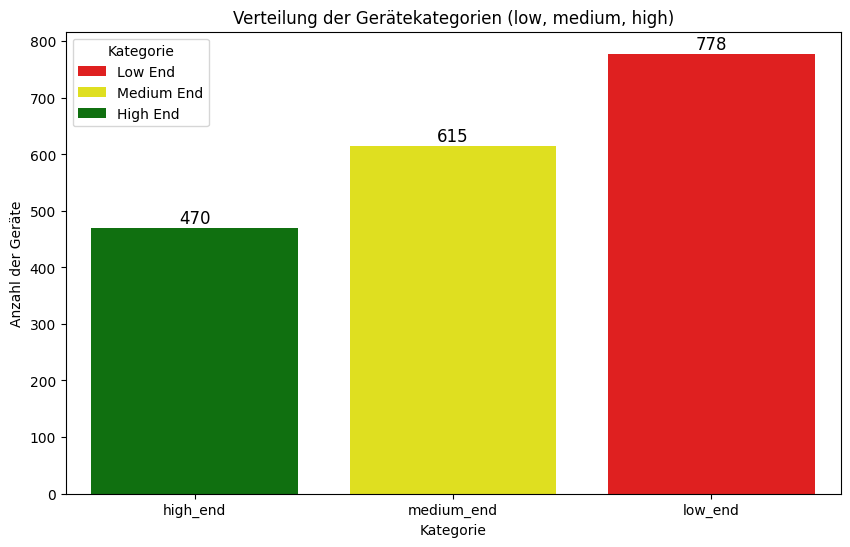

In [43]:
plt.figure(figsize=(10, 6))

# Countplot erstellen mit benutzerdefinierter Farbpalette
ax = sns.countplot(data=categorized_data, x='Overall_category', hue='Overall_category', 
                   palette={'high_end': 'green', 'medium_end': 'yellow', 'low_end': 'red'},
                   order=['high_end', 'medium_end', 'low_end'])

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Verteilung der Gerätekategorien (low, medium, high)")
plt.xlabel("Kategorie")
plt.ylabel("Anzahl der Geräte")

# Anzahl der Geräte auf den Balken drucken
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05,  # Position des Textes
            f'{int(height)}', ha='center', va='bottom', fontsize=12)

# Legende hinzufügen
plt.legend(title="Kategorie", labels=['Low End', 'Medium End', 'High End'])
plt.show()


**2.5. Analyse der Marken in Bezug auf Gerätekategorien**

  - **Grund:** Diese Analyse hilft uns, zu verstehen, welche Marken in den Kategorien `low_end`, `medium_end` und `high_end` stark vertreten sind. Sie zeigt, wie sich Marken im Markt positionieren und welche Zielgruppen sie ansprechen – von Premiumkunden bis hin zu budgetbewussten Käufern. Wir erkennen, ob Marken in bestimmten Segmenten dominieren oder eine ausgewogene Produktpalette anbieten, was uns wertvolle Einblicke in ihre Marktstrategie gibt.

  - **Beobachtung:**
    1. Ein bemerkenswerter Fall ist `OnePlus`, bei dem 87,5% der Geräte in die `high_end`-Kategorie fallen, während nur 12,5% in die `medium_end`-Kategorie eingestuft werden. Aufgrund der relativ geringen Anzahl von Geräten im Datensatz (nur 32), könnte dies jedoch eine Verzerrung darstellen, da diese wenigen Geräte überwiegend im High-End-Bereich angesiedelt sind.

    2. `Samsung` bietet eine ausgewogene Verteilung, mit 29,7% der Geräte in der `high_end`-Kategorie, 40,9% in der `low_end`-Kategorie und 29,3% in der `medium_end`-Kategorie. Da `Samsung` mit 259 Geräten der am häufigsten vertretene Hersteller im Datensatz ist, lässt sich sagen, dass die breite Produktpalette von Samsung in verschiedenen Leistungsklassen gut reflektiert wird.

    3. `LAVA` ist eine Marke, die fast ausschließlich Geräte im `low_end`-Bereich (85,7%) anbietet. Aber auch hier muss berücksichtigt werden, dass `LAVA` nur 35 Geräte im Datensatz hat, was den Eindruck erweckt, dass die Marke stark auf günstige Geräte fokussiert ist, ohne dass dies ein vollständiges Bild der gesamten Marke widerspiegelt.

    4. `Honor` (mit 39 Geräten) und `Huawei` (mit 90 Geräten) haben beide eine hohe Anzahl von `high_end`-Geräten (53,8% bzw. 43,3%). Diese Marken bieten insgesamt mehr Premium-Produkte an, jedoch sollte berücksichtigt werden, dass Huawei in diesem Datensatz breitere Produktkategorien abdecken könnte, da mehr Geräte enthalten sind.

    5. `Micromax` hat 93,1% `low_end`-Geräte. Bei nur 29 Geräten im Datensatz könnte auch hier ein eingeschränkter Fokus auf Budgetgeräte vorliegen, der nicht das vollständige Produktsortiment der Marke widerspiegelt.

    6. `Meizu` zeigt mit 83,3% der Geräte in der `medium_end`-Kategorie eine starke Konzentration auf Mittelklasseprodukte. Mit nur 24 Geräten im Datensatz kann diese Marke in ihrem gesamten Portfolio noch eine andere Gewichtung aufweisen.

  - **Code:**

Prozentuale Verteilung der Kategorien pro Marke (Top 20 Marken):
Overall_category    low_end  medium_end   high_end
Brand                                             
Google            16.666667   54.166667  29.166667
Micromax          93.103448    6.896552   0.000000
Apple             22.580645   58.064516  19.354839
OnePlus            0.000000   12.500000  87.500000
LAVA              85.714286   14.285714   0.000000
Lenovo            38.888889   58.333333   2.777778
Honor              5.128205   41.025641  53.846154
Asus              11.111111   53.333333  35.555556
BLU               69.642857   21.428571   8.928571
OPPO              12.280702   28.070175  59.649123
Sony              29.687500   50.000000  20.312500
ZTE               47.761194   40.298507  11.940299
Alcatel           65.333333   34.666667   0.000000
HTC               67.073171   30.487805   2.439024
Nokia             49.425287   40.229885  10.344828
Huawei            28.888889   27.777778  43.333333
Xiaomi           

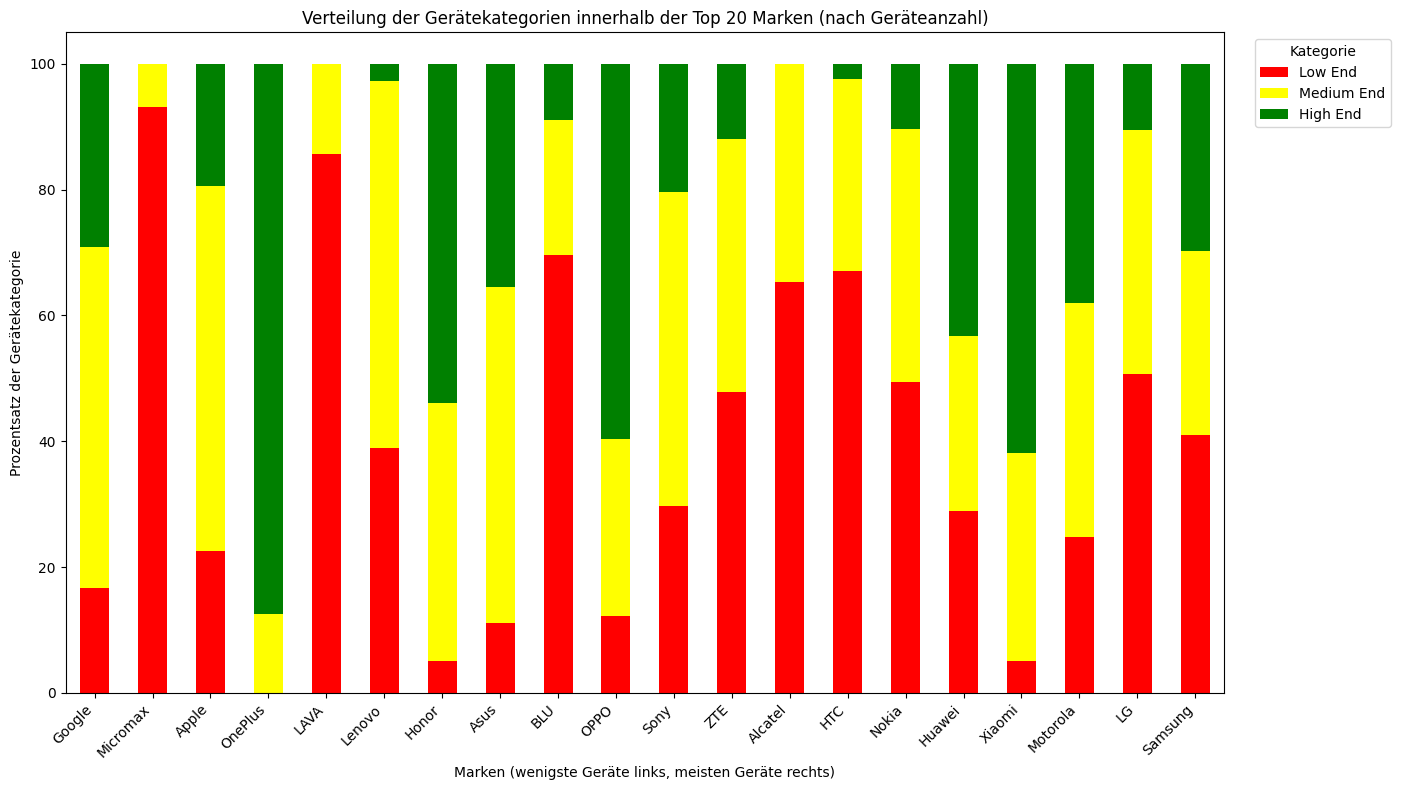

In [44]:
# Sicherstellen, dass 'categorized_data' existiert und die Spalten 'Brand' und 'Overall_category' vorhanden sind
top_brands = categorized_data['Brand'].value_counts().nlargest(20).index
top_brands_data = categorized_data[categorized_data['Brand'].isin(top_brands)]

# Berechnung der prozentualen Verteilung der Kategorien pro Marke
brand_category_counts = top_brands_data.groupby(['Brand', 'Overall_category']).size().unstack().fillna(0)
brand_category_percent = (brand_category_counts.T / brand_category_counts.sum(axis=1)).T * 100

# Marken nach Anzahl der Geräte ordnen (von wenigsten bis meisten Geräten)
brand_order = brand_category_counts.sum(axis=1).sort_values().index

# Prozentuale Verteilung der Kategorien pro Marke (nach Geräteanzahl geordnet)
brand_category_percent_sorted = brand_category_percent.loc[brand_order]

# Daten drucken - Reihenfolge der Kategorien anpassen (low_end, medium_end, high_end)
print("Prozentuale Verteilung der Kategorien pro Marke (Top 20 Marken):")
print(brand_category_percent_sorted[['low_end', 'medium_end', 'high_end']])

# Zählen der Häufigkeit der Marken (nach Anzahl der Geräte)
brand_counts = categorized_data['Brand'].value_counts()

# Top 20 Marken mit den meisten Handys, sortiert von wenigsten bis meisten Geräten
top_20_brands_sorted_by_count = brand_counts.sort_values().tail(20)

# Ausgabe der Marken und ihrer Häufigkeit
print()
print("Top 20 Marken mit den meisten Geräten:")
print(top_20_brands_sorted_by_count)

# Visualisierung der Kategorie-Verteilung pro Marke
ax = brand_category_percent_sorted[['low_end', 'medium_end', 'high_end']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(14, 8),
    color=['red', 'yellow', 'green']  # Farbkodierung: rot, gelb, grün
)

plt.title("Verteilung der Gerätekategorien innerhalb der Top 20 Marken (nach Geräteanzahl)")
plt.xlabel("Marken (wenigste Geräte links, meisten Geräte rechts)")
plt.ylabel("Prozentsatz der Gerätekategorie")

# Positionierung der Legende in der oberen rechten Ecke
plt.legend(
    title="Kategorie", 
    labels=['Low End', 'Medium End', 'High End'], 
    loc='upper right', 
    bbox_to_anchor=(1.15, 1)  # Verschiebt die Legende außerhalb der Achsen
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Passt den Plot an, um Überschneidungen zu vermeiden
plt.show()

**2.6. Entwicklung der Smartphone-Merkmale über die Jahre**

  - **Grund:** Diese Analyse untersucht die Veränderung wichtiger Smartphone-Merkmale im Laufe der Jahre. Ziel ist es, Trends in der Entwicklung von `Speicher`, `Arbeitsspeicher`, `Kameraauflösungen`, `Batteriekapazität` und weiteren technischen Merkmalen zu erkennen.

  - **Beobachtung:** 
    1. `Primary Storage (Speicher):` Der Speicher hat von 16 GB im Jahr 2007 auf 139 GB im Jahr 2022 zugenommen, mit einem markanten Anstieg ab 2015. Vor 2015 war das Wachstum relativ moderat, zwischen 9 GB und 18 GB. Ab 2015 nahm der Speicher jedoch rapide zu, insbesondere in den Jahren 2016 bis 2022, mit einem besonders starken Anstieg von 37 GB im Jahr 2016 auf 139 GB im Jahr 2022. Dies zeigt die steigenden Anforderungen der Nutzer an Apps, Spiele und Mediendateien.
   
    2. `Memory (Arbeitsspeicher):` Der Arbeitsspeicher stieg von 0,1 GB im Jahr 2007 auf 7 GB im Jahr 2022. Die Entwicklung verlief zunächst moderat mit kleinen jährlichen Steigerungen, aber ab 2015 begann der Arbeitsspeicher deutlich anzusteigen. Insbesondere 2016 bis 2022 gab es kontinuierliche Zuwächse, mit einem sprunghaften Anstieg im Jahr 2021, als der Arbeitsspeicher 6 GB erreichte. Diese Entwicklung entspricht den steigenden Anforderungen moderner Anwendungen und Multitasking.

    3. `Primary Camera (Hauptkamera):` Die Auflösung der Hauptkamera stieg von 2 MP im Jahr 2007 auf 55 MP im Jahr 2022. Die Entwicklung war zunächst moderat, mit einem stetigen Anstieg von 2 MP auf 7 MP bis 2014. Der größte Sprung ereignete sich jedoch in den Jahren 2015 bis 2020, als die Kameraauflösungen auf über 25 MP anstiegen und 2020 die 40 MP-Marke überschritten. Dieser Trend unterstreicht das wachsende Interesse an leistungsfähigeren Kameras für bessere Fotografie und Videoaufnahmen.

    4. `Battery (Batteriekapazität):` Die Batteriekapazität stieg von 1400 mAh im Jahr 2007 auf 4862 mAh im Jahr 2022. Während die ersten Jahre nur moderate Zuwächse von etwa 50-100 mAh pro Jahr verzeichneten, stieg die Batteriekapazität ab 2016 erheblich an. 2015 wurde die 2000 mAh-Marke überschritten, und ab 2016 begann ein stärkerer Anstieg, der 2020 die 4000 mAh-Marke erreichte. Dies zeigt den zunehmenden Bedarf, größere Akkus zu verbauen, um die immer leistungsfähigeren Geräte und Displays zu unterstützen.

    5. `Total Resolution (Gesamtauflösung):` Die Displayauflösung stieg von 153.600 Pixeln im Jahr 2007 auf 2,82 Millionen Pixel im Jahr 2022. Es gab einen stetigen, aber langsamen Anstieg bis 2014, als die Auflösung die 800.000 Pixel erreichte. Der größte Sprung kam jedoch nach 2015, als die Gesamtauflösung innerhalb von nur fünf Jahren um mehr als das Doppelte wuchs. 2020 erreichte sie 2 Millionen Pixel und stieg bis 2022 auf über 2,8 Millionen. Dieser Trend spiegelt das zunehmende Interesse an hochauflösenden Displays wider.

    6. `Display Refresh Rate (Bildwiederholfrequenz):` Die Bildwiederholfrequenz stieg von konstanten 60 Hz in den Jahren 2007 bis 2017 auf 105,77 Hz im Jahr 2022. Während die ersten Jahre keine nennenswerte Veränderung zeigten, begann die Bildwiederholfrequenz 2017 moderat anzusteigen. 2018-2020 gab es weitere sprunghafte Erhöhungen, insbesondere 2020, als die Bildwiederholfrequenz von 60 Hz auf 72 Hz stieg. Ab 2021 nahm der Anstieg weiter zu, um das Benutzererlebnis flüssiger zu gestalten, was durch die 105 Hz im Jahr 2022 verdeutlicht wird.

    7. `Display Size (Bildschirmgröße):` Die Bildschirmgröße wuchs von 3,5 Zoll im Jahr 2007 auf 6,58 Zoll im Jahr 2022. Während die ersten Jahre einen langsamen Anstieg von etwa 3,5 bis 4 Zoll erlebten, stieg die Größe ab 2014 schneller an, mit einer stärkeren Zunahme von 4,7 Zoll im Jahr 2014 auf über 5 Zoll im Jahr 2016. Ab 2019 stagnierte das Wachstum etwas, was darauf hindeutet, dass größere Bildschirme immer noch gewünscht werden, aber die praktischen Größen eher begrenzt sind.

    8. `Front Camera (Frontkameraauflösung):` Die Frontkameraauflösung war anfangs 0 MP (2007–2009) und stieg ab 2010 mit 0,3 MP sehr moderat an. Seit 2015 jedoch hat die Auflösung deutlich zugenommen, mit einer sprunghaften Steigerung von 1,07 MP in 2011 auf 3,86 MP in 2015. Ab 2016 nahm der Anstieg weiter zu, wobei 2022 eine Frontkamera mit einer Auflösung von 18 MP erreicht wurde. Diese Entwicklung zeigt den zunehmenden Fokus auf Selfies und Videoanrufe als wichtige Funktionen von Smartphones.

    9. `Beobachtung zu den skalierten Werten:` Die skalierten Werte zeigen einige interessante Ausreißer in der Entwicklung der Smartphone-Merkmale. Besonders auffällig ist die `Displaygröße`, die ab 2010 einen starken Anstieg erlebte, während andere Merkmale eine gleichmäßigere Entwicklung aufwiesen. Im Gegensatz dazu blieb die `Bildwiederholfrequenz (Display Refresh Rate)` bis 2017 nahezu unverändert und zeigte erst ab diesem Jahr einen merklichen Anstieg, was im Vergleich zu den anderen Merkmalen, die kontinuierlicher wuchsen, ungewöhnlich ist. Die `Primärkameraauflösung` verzeichnete ebenfalls einen späten, aber steilen Anstieg ab 2019, was im Vergleich zu anderen Merkmalen, die bereits vorher eine kontinuierliche Entwicklung durchliefen, auffällt. Alle anderen Merkmale wie `Speicher`, `Arbeitsspeicher`, `Batteriekapazität` und `Gesamtauflösung` zeigten dagegen vergleichbare, eher konstante Wachstumsraten über die Jahre.
      
  - **Code:** 

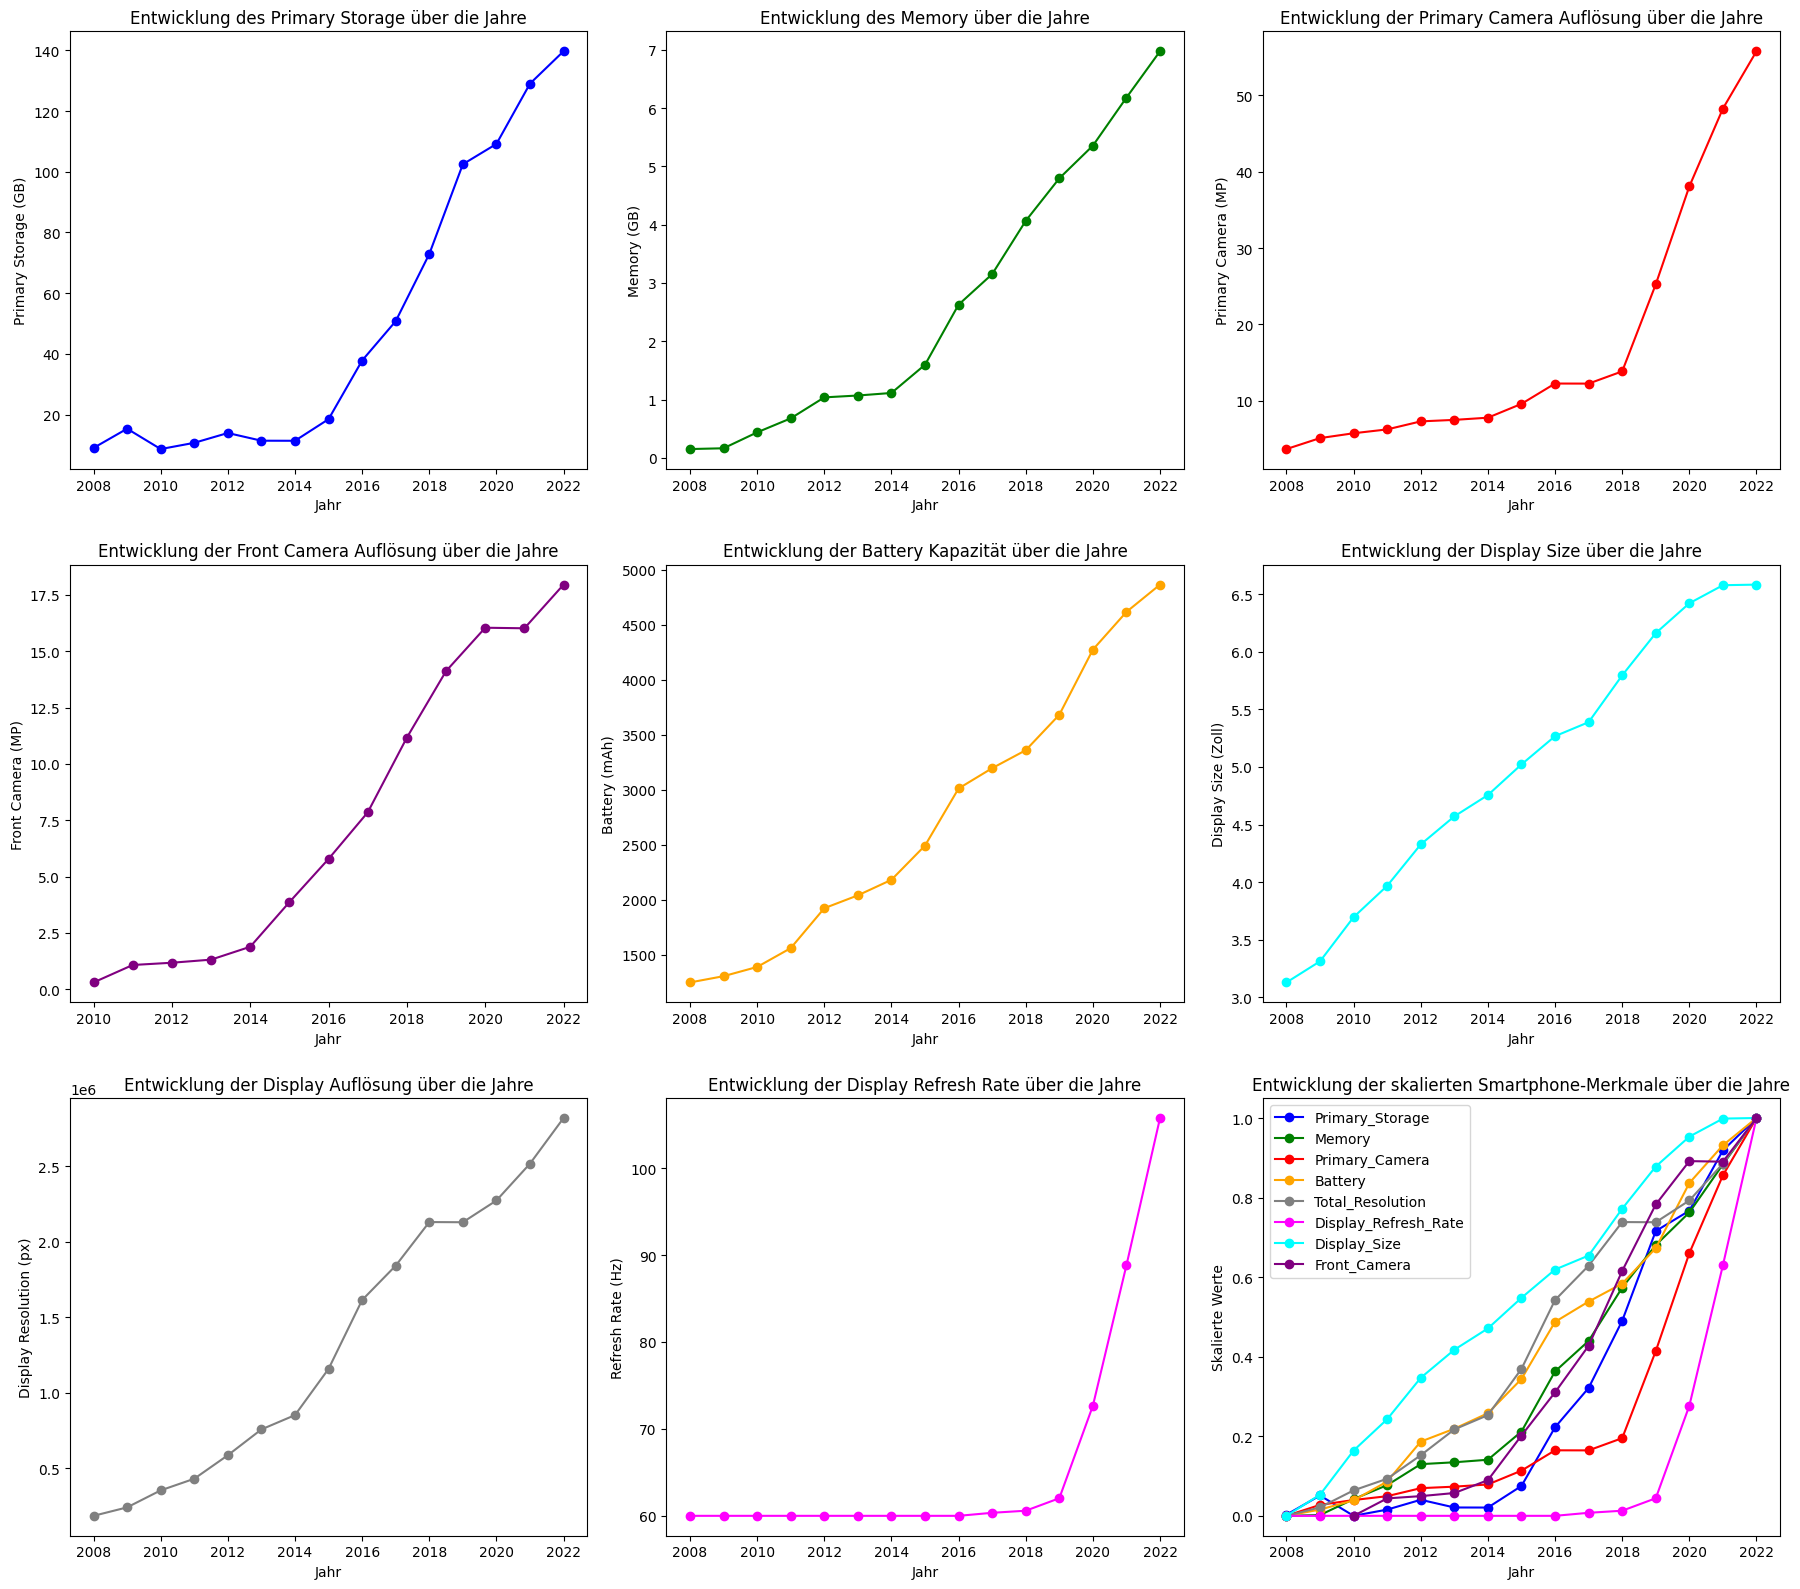

Kombinierte Tabelle der Original- und skalierten Werte über die Jahre:
                    Original                                        \
             Primary_Storage    Memory Primary_Camera      Battery   
Release_Year                                                         
2008                9.000000  0.150000       3.700000  1247.000000   
2009               15.333333  0.163333       5.133333  1303.933333   
2010                8.633333  0.436667       5.766667  1387.666667   
2011               10.685714  0.676429       6.271429  1558.714286   
2012               13.920000  1.036667       7.320000  1921.600000   
2013               11.384615  1.068681       7.516484  2038.538462   
2014               11.360544  1.112245       7.802721  2179.761905   
2015               18.474474  1.596096       9.612613  2490.780781   
2016               37.808511  2.627660      12.271277  3009.867021   
2017               50.767442  3.151163      12.261628  3194.348837   
2018               

In [45]:
# Gruppierung nach Jahr und Berechnung des Durchschnitts für die Merkmale
grouped_data = categorized_data.groupby('Release_Year')[['Primary_Storage', 'Memory', 'Primary_Camera', 'Battery',
                                                         'Total_Resolution', 'Display_Refresh_Rate', 
                                                         'Display_Size', 'Front_Camera']].mean()

# Skalierung der Daten auf den Bereich [0, 1] mit Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(grouped_data)

# Erstellen eines neuen DataFrames mit den skalierten Daten
scaled_grouped_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

# Definieren der Farben, die in den individuellen Plots verwendet wurden
colors = {
    'Primary_Storage': 'blue',
    'Memory': 'green',
    'Primary_Camera': 'red',
    'Front_Camera': 'purple',
    'Battery': 'orange',
    'Display_Size': 'cyan',
    'Total_Resolution': 'grey',
    'Display_Refresh_Rate': 'magenta'
}

# Visualisierung der Entwicklung dieser Merkmale im Zeitverlauf
plt.figure(figsize=(18, 16))

# Plot für Primary Storage
plt.subplot(3, 3, 1)
plt.plot(grouped_data.index, grouped_data['Primary_Storage'], marker='o', color=colors['Primary_Storage'])
plt.title('Entwicklung des Primary Storage über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Primary Storage (GB)')

# Plot für Memory
plt.subplot(3, 3, 2)
plt.plot(grouped_data.index, grouped_data['Memory'], marker='o', color=colors['Memory'])
plt.title('Entwicklung des Memory über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Memory (GB)')

# Plot für Primary Camera
plt.subplot(3, 3, 3)
plt.plot(grouped_data.index, grouped_data['Primary_Camera'], marker='o', color=colors['Primary_Camera'])
plt.title('Entwicklung der Primary Camera Auflösung über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Primary Camera (MP)')

# Plot für Front Camera
plt.subplot(3, 3, 4)
plt.plot(grouped_data.index, grouped_data['Front_Camera'], marker='o', color=colors['Front_Camera'])
plt.title('Entwicklung der Front Camera Auflösung über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Front Camera (MP)')

# Plot für Battery
plt.subplot(3, 3, 5)
plt.plot(grouped_data.index, grouped_data['Battery'], marker='o', color=colors['Battery'])
plt.title('Entwicklung der Battery Kapazität über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Battery (mAh)')

# Plot für Display Size
plt.subplot(3, 3, 6)
plt.plot(grouped_data.index, grouped_data['Display_Size'], marker='o', color=colors['Display_Size'])
plt.title('Entwicklung der Display Size über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Display Size (Zoll)')

# Plot für Display Resolution
plt.subplot(3, 3, 7)
plt.plot(grouped_data.index, grouped_data['Total_Resolution'], marker='o', color=colors['Total_Resolution'])
plt.title('Entwicklung der Display Auflösung über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Display Resolution (px)')

# Plot für Display Refresh Rate
plt.subplot(3, 3, 8)
plt.plot(grouped_data.index, grouped_data['Display_Refresh_Rate'], marker='o', color=colors['Display_Refresh_Rate'])
plt.title('Entwicklung der Display Refresh Rate über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Refresh Rate (Hz)')

# Plot für alle skalierten Merkmale (mit den gleichen Farben wie die ursprünglichen Plots)
plt.subplot(3, 3, 9)
for column in scaled_grouped_data.columns:
    plt.plot(scaled_grouped_data.index, scaled_grouped_data[column], marker='o', label=column, color=colors[column])

# Hinzufügen von Beschriftungen und Legende für den letzten Plot
plt.title('Entwicklung der skalierten Smartphone-Merkmale über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Skalierte Werte')
plt.legend()

# Diagramm anpassen und anzeigen
plt.tight_layout()
plt.show()

# Kombinieren der Originaldaten und der skalierten Daten in einem gemeinsamen DataFrame
combined_data = pd.concat([grouped_data, scaled_grouped_data], axis=1, keys=['Original', 'Scaled'])

# Ausgabe der kombinierten Tabelle
print("Kombinierte Tabelle der Original- und skalierten Werte über die Jahre:")
print(combined_data)

**2.7. Entwicklung der Smartphone-Merkmale nach Gerätetypen im Zeitverlauf**

  - **Grund:** Ziel dieser Analyse ist es, die langfristige Entwicklung von Smartphone-Merkmalen (z. B. `Speicher`, `Arbeitsspeicher`, `Kameraauflösungen`, `Batteriekapazität`) zu untersuchen und die Unterschiede in den Wachstumstrends der verschiedenen Kategorien (`Low-End`, `Medium-End`, `High-End`) zu identifizieren. Es wird untersucht, wie sich die Wachstumsdynamik der verschiedenen Merkmale über die Jahre entwickelt hat und welche Kategorien in den letzten Jahren stärkere Fortschritte gemacht haben. 

  - **Beobachtung:**


        1. `Primary Storage (Speicher):`
            
            - `High-End-Geräte:` Die Wachstumsraten der `High-End-Geräte` zeigen über die Jahre hinweg starke Schwankungen. Besonders auffällig ist der Rückgang im Jahr 2020 mit `-3,30%`, was auf eine Stagnation oder sogar einen Rückgang im Wachstum der High-End-Smartphones in diesem Jahr hinweist. Abgesehen von diesem Rückgang gibt es Erholungen und eine Stabilisierung ab 2015, aber das Wachstum bleibt moderat. Insgesamt lässt sich feststellen, dass das Wachstum bei High-End-Geräten in den letzten Jahren `langsamer` geworden ist im Vergleich zu den ersten Jahren (z.B. `+100%` in 2009, `+73,08%` in 2012).
           
            - `Medium-End-Geräte:` Die Wachstumsraten für `Medium-End-Geräte` zeigen starke Schwankungen, besonders im Jahr 2009 mit `100%` und auch 2012 mit `68,40%`. Danach gibt es aber auch starke Rückgänge, insbesondere 2013 mit `-40,62%` und 2020 mit `+21,02%`. Diese Schwankungen sind typisch für den Übergang von frühen, schnellen Zuwächsen zu einer Marktstabilisierung. Die Zuwächse waren nicht so konstant wie bei Low-End-Geräten.
           
            - `Low-End-Geräte:` verzeichnen besonders in den ersten Jahren (2009 bis 2016) starke Zuwächse, mit einem Spitzenwert von `140%` im Jahr 2009. Es gibt eine spürbare `Erholung` und `Wiederbelebung des Wachstums` ab 2017 und besonders 2020, als der Anstieg mit `92,10%` noch einmal signifikant ausfällt. Das Wachstum bei `Low-End-Geräten` zeigt nicht nur eine schnelle Expansion, sondern auch eine `fortwährende Dynamik`, die sich nicht so sehr verlangsamt hat wie bei den High-End-Modellen.
            
            - `Fazit:` Zusammenfassend lässt sich sagen, dass die Hypothese zutrifft High-End-Smartphones haben in den letzten Jahren ein langsameres Wachstum gezeigt als Low-End-Smartphones. Während die Wachstumsraten der Low-End-Geräte in den letzten Jahren noch stark anstiegen (insbesondere 2020), stagnieren oder fallen die Wachstumsraten bei High-End-Smartphones ab, was auf eine gesättigte Marktsituation und die Erreichung des technologischen Maximums hinweist.

        2. `Memory (Speicher):`
          
            - `High-End-Geräte:` Die Wachstumsraten der `High-End-Geräte` zeigen über die Jahre hinweg eine deutliche Abnahme. Besonders auffällig ist der Rückgang im Jahr 2020 mit `-2,42%`, was auf eine Stagnation oder einen Rückgang im Wachstum der High-End-Smartphones in diesem Jahr hinweist. Auch in den Jahren 2017 bis 2019 zeigt sich ein langsameres Wachstum mit `51,58%` in 2017, `0,54%` in 2018 und `40,68%` in 2019. Abgesehen von diesen schwankenden Jahren ist erkennbar, dass das Wachstum bei High-End-Geräten in den letzten Jahren langsamer geworden ist im Vergleich zu den früheren Jahren (z.B. `+112,50%` in 2010 und `+56,86%` in 2011).
            
            - `Medium-End-Geräte:` Die Wachstumsraten für `Medium-End-Geräte` schwanken ebenfalls stark. In den Jahren 2017 und 2019 gab es moderate Zuwächse von `+20,68%` bzw. `+21,92%`. Der Rückgang im Jahr 2018 mit `+10,49%` und die stärkeren Zuwächse in den frühen Jahren (z.B. `+100%` in 2010) zeigen ebenfalls eine Abnahme des Wachstums. Es wird ersichtlich, dass die Medium-End-Geräte ein stark schwankendes Wachstum zeigen und in den letzten Jahren nicht mit den Wachstumsraten der Low-End-Geräte mithalten können.
           
            - `Low-End-Geräte:` `Low-End-Geräte` zeigen besonders in den ersten Jahren (2010 mit `+155%` und 2011 mit `+89,72%`) starkes Wachstum. Ab 2016 gibt es weiterhin ein hohes Wachstum, besonders 2020 mit `+41,02%`, das darauf hindeutet, dass Low-End-Geräte in den letzten Jahren weiterhin eine starke Expansion erfahren haben. Im Jahr 2022 stieg das Wachstum erneut auf `+36,59%`, was zeigt, dass das Wachstum bei Low-End-Geräten auch in den letzten Jahren sehr dynamisch blieb, ohne die gleiche Verlangsamung wie bei High-End-Geräten.
           
            - `Fazit:` Zusammenfassend lässt sich sagen, dass die `Hypothese zutrifft`: High-End-Smartphones haben in den letzten Jahren ein langsameres Wachstum gezeigt als Low-End-Smartphones. Während die Wachstumsraten der Low-End-Geräte in den letzten Jahren `stark anstiegen` (insbesondere 2020 mit `41,02%` und 2022 mit `36,59%`), `stagnieren` oder `fallen` die Wachstumsraten bei High-End-Smartphones, was auf eine gesättigte Marktsituation hinweist. Besonders bemerkenswert ist der Rückgang im Jahr 2020 bei High-End-Geräten und die weiterhin hohen Wachstumsraten bei Low-End-Geräten.

        3. `Primary Camera (Hauptkamera):`
           
            - `High-End-Geräte:` Die Wachstumsraten der `High-End-Geräte` zeigen im Laufe der Jahre starke Schwankungen. Besonders auffällig ist das Wachstum im Jahr 2012 mit `+284%`, was durch bedeutende Fortschritte bei der Kameratechnologie in High-End-Smartphones verursacht wurde. Ab 2015 sind die Wachstumsraten tendenziell niedriger, mit `33,20%` in 2015 und `-5,48%` in 2016. Ab 2019 gab es einen Anstieg mit `160,78%`, was auf eine zunehmende Fokussierung auf die Verbesserung der Kameraqualität in High-End-Geräten hinweist. Insgesamt lässt sich jedoch feststellen, dass das Wachstum bei High-End-Geräten, vor allem in den letzten Jahren, `langsamer` geworden ist, im Vergleich zu den großen Anstiegen zu Beginn der Jahre.
           
            - `Medium-End-Geräte:` Bei den `Medium-End-Geräten` ist das Wachstum im Bereich der Kameraqualität insgesamt gering und schwankt erheblich. In den Jahren 2012 und 2013 gibt es keine nennenswerten Veränderungen, und das Wachstum bleibt in den meisten Jahren relativ flach. Einzig im Jahr 2019 gab es einen signifikanten Anstieg mit `+83,30%`, was auf eine Verbesserung der Kameratechnologie in diesem Segment hinweist. Trotzdem bleibt das Wachstum insgesamt im Vergleich zu den Low-End-Geräten begrenzt und weniger konstant.
           
            - `Low-End-Geräte:` `Low-End-Geräte` zeigen in den ersten Jahren schwaches Wachstum, mit einem Rückgang in den Jahren 2012, 2013 und 2014. Ab 2015 gibt es jedoch eine deutliche Verbesserung mit `+49,17%` und `+32,35%` in den folgenden Jahren. Besonders bemerkenswert ist der Anstieg in 2021 mit `+156,73%`, was auf eine stärkere Fokussierung auf die Kamerafunktionalität auch bei günstigen Geräten hinweist. Insgesamt zeigen Low-End-Geräte ein dynamisches Wachstum, besonders in den letzten Jahren, was auf die zunehmende Bedeutung der Kameraqualität in diesem Segment hinweist.
           
            - `Fazit:` Zusammenfassend lässt sich sagen, dass die `Hypothese zutrifft`: High-End-Smartphones haben in den letzten Jahren ein langsameres Wachstum im Bereich der Kameraqualität gezeigt als Low-End-Smartphones. Während die Wachstumsraten der Low-End-Geräte, insbesondere ab 2015, `deutlich anstiegen` (z.B. `+156,73%` in 2021), stagnieren oder verlangsamen sich die Wachstumsraten bei High-End-Geräten (z.B. `-5,48%` in 2016 und `33,20%` in 2015), was auf eine zunehmende Marktsättigung und die Erreichung von technologischen Grenzen bei teureren Geräten hinweist. Low-End-Geräte hingegen zeigen ein `stärkeres Wachstum` in den letzten Jahren, was die zunehmende Verfügbarkeit besserer Kamerafunktionen in günstigeren Smartphones widerspiegelt.

        4. `Front Camera (Frontkamera):`
           
            - `High-End-Geräte:` Die Wachstumsraten der `High-End-Geräte` im Bereich der Frontkamera zeigen im Verlauf der Jahre zunächst starke Anstiege. Besonders auffällig ist das Wachstum im Jahr 2013 mit `+27,71%` und 2014 mit `+74,83%`, was durch die zunehmende Bedeutung der Frontkameras in High-End-Smartphones (z.B. für Selfies) bedingt ist. Ab 2015 bleibt das Wachstum jedoch moderater und flacht später zunehmend ab. 2017 verzeichnet das Wachstum `+81,64%`, aber in den darauffolgenden Jahren sind die Werte deutlich niedriger, mit `+3,83%` in 2020 und `+3,41%` in 2021. Diese Abflachung zeigt, dass das Wachstum bei den Frontkameras von High-End-Geräten in den letzten Jahren `langsamer` geworden ist, was auf eine Sättigung des Marktes und das Erreichen eines technologischen Maximums hindeutet.
            
            - `Medium-End-Geräte:` Bei den `Medium-End-Geräten` gab es 2013 ein geringes Wachstum von `+2,23%` und 2014 einen deutlicheren Anstieg von `+32,12%`. Das Wachstum setzte sich 2015 mit `+172,90%` stark fort, was auf ein großes Interesse an Frontkameras auch im mittleren Preissegment hinweist. Doch nach diesem Anstieg verlangsamen sich die Zuwächse, mit nur `+9,48%` in 2019 und `+2,72%` in 2020. Auch in 2021 gab es sogar einen Rückgang von `-1,63%`. Diese Schwankungen und das zunehmende Absinken der Wachstumsraten deuten darauf hin, dass das Marktsegment für Frontkameras bei Medium-End-Geräten ebenfalls einer Marktsättigung entgegengeht.
            
            - `Low-End-Geräte:` `Low-End-Geräte` zeigen besonders 2015 einen außergewöhnlichen Anstieg von `+337,34%`, was auf die zunehmende Bedeutung von Frontkameras in günstigen Smartphones hinweist. Im Jahr 2017 gab es einen weiteren starken Anstieg von `+218,19%`, aber auch hier flacht das Wachstum in den darauffolgenden Jahren zunehmend ab, mit `+5,86%` in 2020 und `+2,58%` in 2021. Dennoch zeigen Low-End-Geräte in den letzten Jahren ein stärkeres Wachstum als High-End-Geräte, auch wenn die Zuwächse langsamer werden.
            
            - `Fazit:` Zusammenfassend lässt sich sagen, dass die `Hypothese zutrifft`, dass High-End-Smartphones in den letzten Jahren ein langsameres Wachstum im Bereich der Frontkameras gezeigt haben als Low-End-Smartphones. Während die Frontkameras in High-End-Smartphones bis 2015 stark wuchsen, sind die Zuwächse danach deutlich moderater. Auf der anderen Seite verzeichnen Low-End-Smartphones noch immer eine relativ hohe Wachstumsrate in den letzten Jahren, obwohl auch hier die Zuwächse ab 2017 zurückgegangen sind. Insgesamt lässt sich sagen, dass `Low-End-Geräte` in den letzten Jahren ein schnelleres Wachstum aufwiesen, was die zunehmende Bedeutung der Frontkamera in günstigeren Smartphones widerspiegelt.


        5. `Battery (Batterie):`
           
            - `High-End-Geräte:` Die Wachstumsraten für `High-End-Geräte` im Bereich der Batterie zeigen insgesamt ein langsames, aber stetiges Wachstum. Besonders hervorzuheben ist das Wachstum im Jahr `2022 mit +18,69%`, was auf eine signifikante Steigerung der Batteriekapazität oder Effizienz bei High-End-Modellen hinweist. In den Jahren zuvor gab es auch eine gute Entwicklung, wie z.B. `+31,90%` im Jahr 2012 und `+18,90%` im Jahr 2011. Abgesehen von einem Rückgang im Jahr 2014 mit `+12,35%` und den moderaten Zuwächsen in den Jahren 2018-2020 (zwischen `+1,63%` und `+13,01%`), zeigt sich insgesamt eine positive Entwicklung. Das Wachstum von High-End-Smartphones hat sich in den letzten Jahren nicht verlangsamt, sondern blieb `stabil und stark`, insbesondere im Vergleich zu den ersten Jahren.
            
            - `Medium-End-Geräte:` Bei `Medium-End-Geräten` gab es in den Jahren vor 2015 einige starke Wachstumsraten wie `+14,32%` (2012) und `+21,99%` (2016). Ab 2017 verlangsamt sich das Wachstum jedoch merklich, was zu moderaten Zuwächsen führte, z.B. `+8,71%` (2017) und `+3,43%` (2018). In den Jahren 2019 und 2020 gab es jedoch eine gewisse Erholung mit `+16,71%` und `+12,67%`. Die Wachstumsraten bleiben insgesamt stabil, aber im Vergleich zu High-End-Geräten weniger dynamisch.
            
            - `Low-End-Geräte:` `Low-End-Geräte` verzeichneten besonders zu Beginn starke Zuwächse wie `+7,79%` (2010) und `+9,97%` (2012), aber die Wachstumsraten flachten in den folgenden Jahren ab. Besonders 2014 gab es einen Rückgang von `-4,79%`. Ab 2015 nahm das Wachstum wieder zu und erreichte 2016 `+22,73%`. In den letzten Jahren (2019-2021) waren die Wachstumsraten jedoch vergleichsweise moderat. 2021 gab es nur einen Anstieg von `+2,67%`. Daher ist festzustellen, dass Low-End-Geräte in den letzten Jahren weniger dynamisches Wachstum gezeigt haben als noch zu Beginn der Analyse.
            
            - `Fazit:` Zusammenfassend lässt sich sagen, dass `High-End-Geräte` in den letzten Jahren in Bezug auf das `Batteriewachstum` genauso stark, wenn nicht sogar stärker gewachsen sind als `Low-End-Geräte`. Insbesondere im Jahr `2022 mit +18,69%` wuchs die Batterie in High-End-Modellen deutlich stärker als in vielen anderen Jahren, was auf eine kontinuierliche Verbesserung und Nachfrage nach leistungsstarken Batterien bei teuren Smartphones hinweist. Im Vergleich dazu flachten die Wachstumsraten bei Low-End-Geräten ab, was auf eine Verlangsamung des Wachstums hinweist, insbesondere ab 2018.


        6. `Display Size (Displaygröße):`
            
            - `High-End-Geräte:` Die Wachstumsrate der `High-End-Geräte` bei der Displaygröße zeigt im Jahr `2022` ein `positives Wachstum von +0,09%`. Zwar gab es in den Jahren davor einige Schwankungen (z.B. 2011 mit `+14,48%` und 2015 mit `-0,44%`), aber insgesamt ist das Wachstum in den letzten Jahren (ab 2016) relativ moderat geblieben. Dennoch, im Vergleich zu `Low-End-Geräten`, bleibt das Wachstum in `2022` fast konstant.
            
            - `Medium-End-Geräte:` Bei `Medium-End-Geräten` war die Wachstumsrate auch relativ niedrig in den letzten Jahren. 2022 gab es nur `-0,27%` Wachstum. Vorher gab es Phasen von höherem Wachstum, insbesondere 2011 mit `+11,93%`. Aber auch hier zeigt sich eine Verlangsamung des Wachstums in den letzten Jahren.

            - `Low-End-Geräte:` Für `Low-End-Geräte` gab es im Jahr `2022` tatsächlich einen `Rückgang von -0,51%`. Obwohl es in den Jahren 2015 und 2010 hohe Wachstumsraten gab (z.B. `+13,69%` in 2010 und `+15,19%` in 2015), sieht man ab 2022 einen Rückgang, was darauf hindeutet, dass das Wachstum auch bei Low-End-Geräten nicht mehr so stark war.

            - `Fazit:` Im Jahr `2022` haben sowohl `High-End-` als auch `Low-End-Geräte` ein relativ schwaches Wachstum gezeigt, wobei `High-End-Geräte` mit `+0,09%` tatsächlich leicht gewachsen sind, während `Low-End-Geräte` mit `-0,51%` einen leichten Rückgang erlebten. `Medium-End-Geräte` sind sogar in diesem Jahr um `-0,27%` zurückgegangen. In den letzten Jahren (ab 2016) ist das Wachstum der Displaygröße insgesamt verlangsamt und erreicht nun nahezu Null, was auf eine Stabilisierung im Markt hinweist.

        7. `Total Resolution (Gesamtauflösung):`
            - `High-End-Geräte:` Die Wachstumsraten für `High-End-Geräte` sind stark schwankend. Besonders im Jahr `2009` gab es ein Wachstum von `+15,38%`, aber im Jahr `2017` war das Wachstum mit `-2,44%` negativ. 2020 stieg das Wachstum wieder leicht auf `+4,98%`. Im Jahr `2022` war das Wachstum mit `+0,64%` fast vernachlässigbar. Die Wachstumsraten für die `High-End-Geräte` zeigen, dass es von hohen Zuwächsen in den frühen Jahren (z.B. `156%` in 2012) zu einer deutlichen Verlangsamung kam.
            
            - `Medium-End-Geräte:` Die Wachstumsraten bei `Medium-End-Geräten` zeigen ebenfalls deutliche Schwankungen. 2012 gab es mit `+240,32%` einen enormen Anstieg, aber im Jahr `2013` gab es einen Rückgang von `-11,19%`. Seitdem sind die Wachstumsraten eher gering. 2022 war das Wachstum mit `+0,33%` fast null, was auf eine Stabilisierung hindeutet.
            
            - `Low-End-Geräte:` Für `Low-End-Geräte` gab es im Jahr `2009` einen bemerkenswerten Anstieg von `+23,56%`, aber das Wachstum schwankte stark. 2012 stieg es auf `+189,95%`, was auf eine schnelle Verbesserung der Auflösung hinweist. Doch auch hier gab es eine deutliche Verlangsamung, mit einem leichten Anstieg von `+51,49%` im Jahr `2022`. Die `Low-End-Geräte` haben in den letzten Jahren ein moderates, aber konstantes Wachstum gezeigt.

            - `Fazit:` Die Daten zeigen, dass das Wachstum bei `High-End-Geräten` und `Medium-End-Geräten` in den letzten Jahren stark zurückgegangen ist. Insbesondere das Wachstum bei `High-End-Geräten` zeigt eine klare Verlangsamung, mit einem Anstieg von nur `+0,64%` im Jahr `2022`. Bei den `Low-End-Geräten` gibt es immer noch ein positives, wenn auch langsamer werdendes Wachstum, mit `+51,49%` im Jahr `2022`. Auch wenn `Low-End-Geräte` in den letzten Jahren noch immer anstiegen, gibt es keine signifikanten Unterschiede im Wachstum zwischen den Kategorien, und der Markt insgesamt zeigt Anzeichen einer Sättigung, was auf eine Stabilisierung der Technologie und der Gesamtauflösung hinweist.

        8. `Display Refresh Rate (Bildwiederholrate):`
            - `High-End-Geräte:`  
            Für `High-End-Geräte` wurde im Jahr `2022` ein Wachstum von `+4,38%` festgestellt. Da es keine Daten für die Jahre davor gibt, lässt sich nur sagen, dass es in diesem Jahr einen moderaten Zuwachs der Bildwiederholrate bei `High-End-Geräten` gab.
            
            - `Medium-End-Geräte:`  
            Für `Medium-End-Geräte` wurde ein Wachstum von `+10,94%` im Jahr `2022` verzeichnet. Auch hier fehlen die Daten der Vorjahre, sodass nur das Wachstum in `2022` als Referenz betrachtet werden kann. Es zeigt eine vergleichsweise stärkere Zunahme im Wachstum der Bildwiederholrate für diese Kategorie im Jahr `2022` im Vergleich zu `High-End-Geräten`.

            - `Low-End-Geräte:`  
            `Low-End-Geräte` verzeichneten ein Wachstum von `+23,44%` im Jahr `2022`, was das stärkste Wachstum der drei Kategorien darstellt. Dies deutet darauf hin, dass `Low-End-Geräte` im Jahr `2022` einen signifikanten Fortschritt bei der Verbesserung der Bildwiederholrate gemacht haben.

            - `Fazit:`  
            Aufgrund der fehlenden Daten vor 2022 können keine langfristigen Trends für `Display Refresh Rate` im Vergleich der Jahre gezogen werden. Die Daten von `2022` zeigen jedoch, dass `Low-End-Geräte` das größte Wachstum in diesem Bereich aufwiesen, während `Medium-End` und `High-End-Geräte` im Vergleich weniger starke Zuwächse verzeichneten.

  - **Code:**

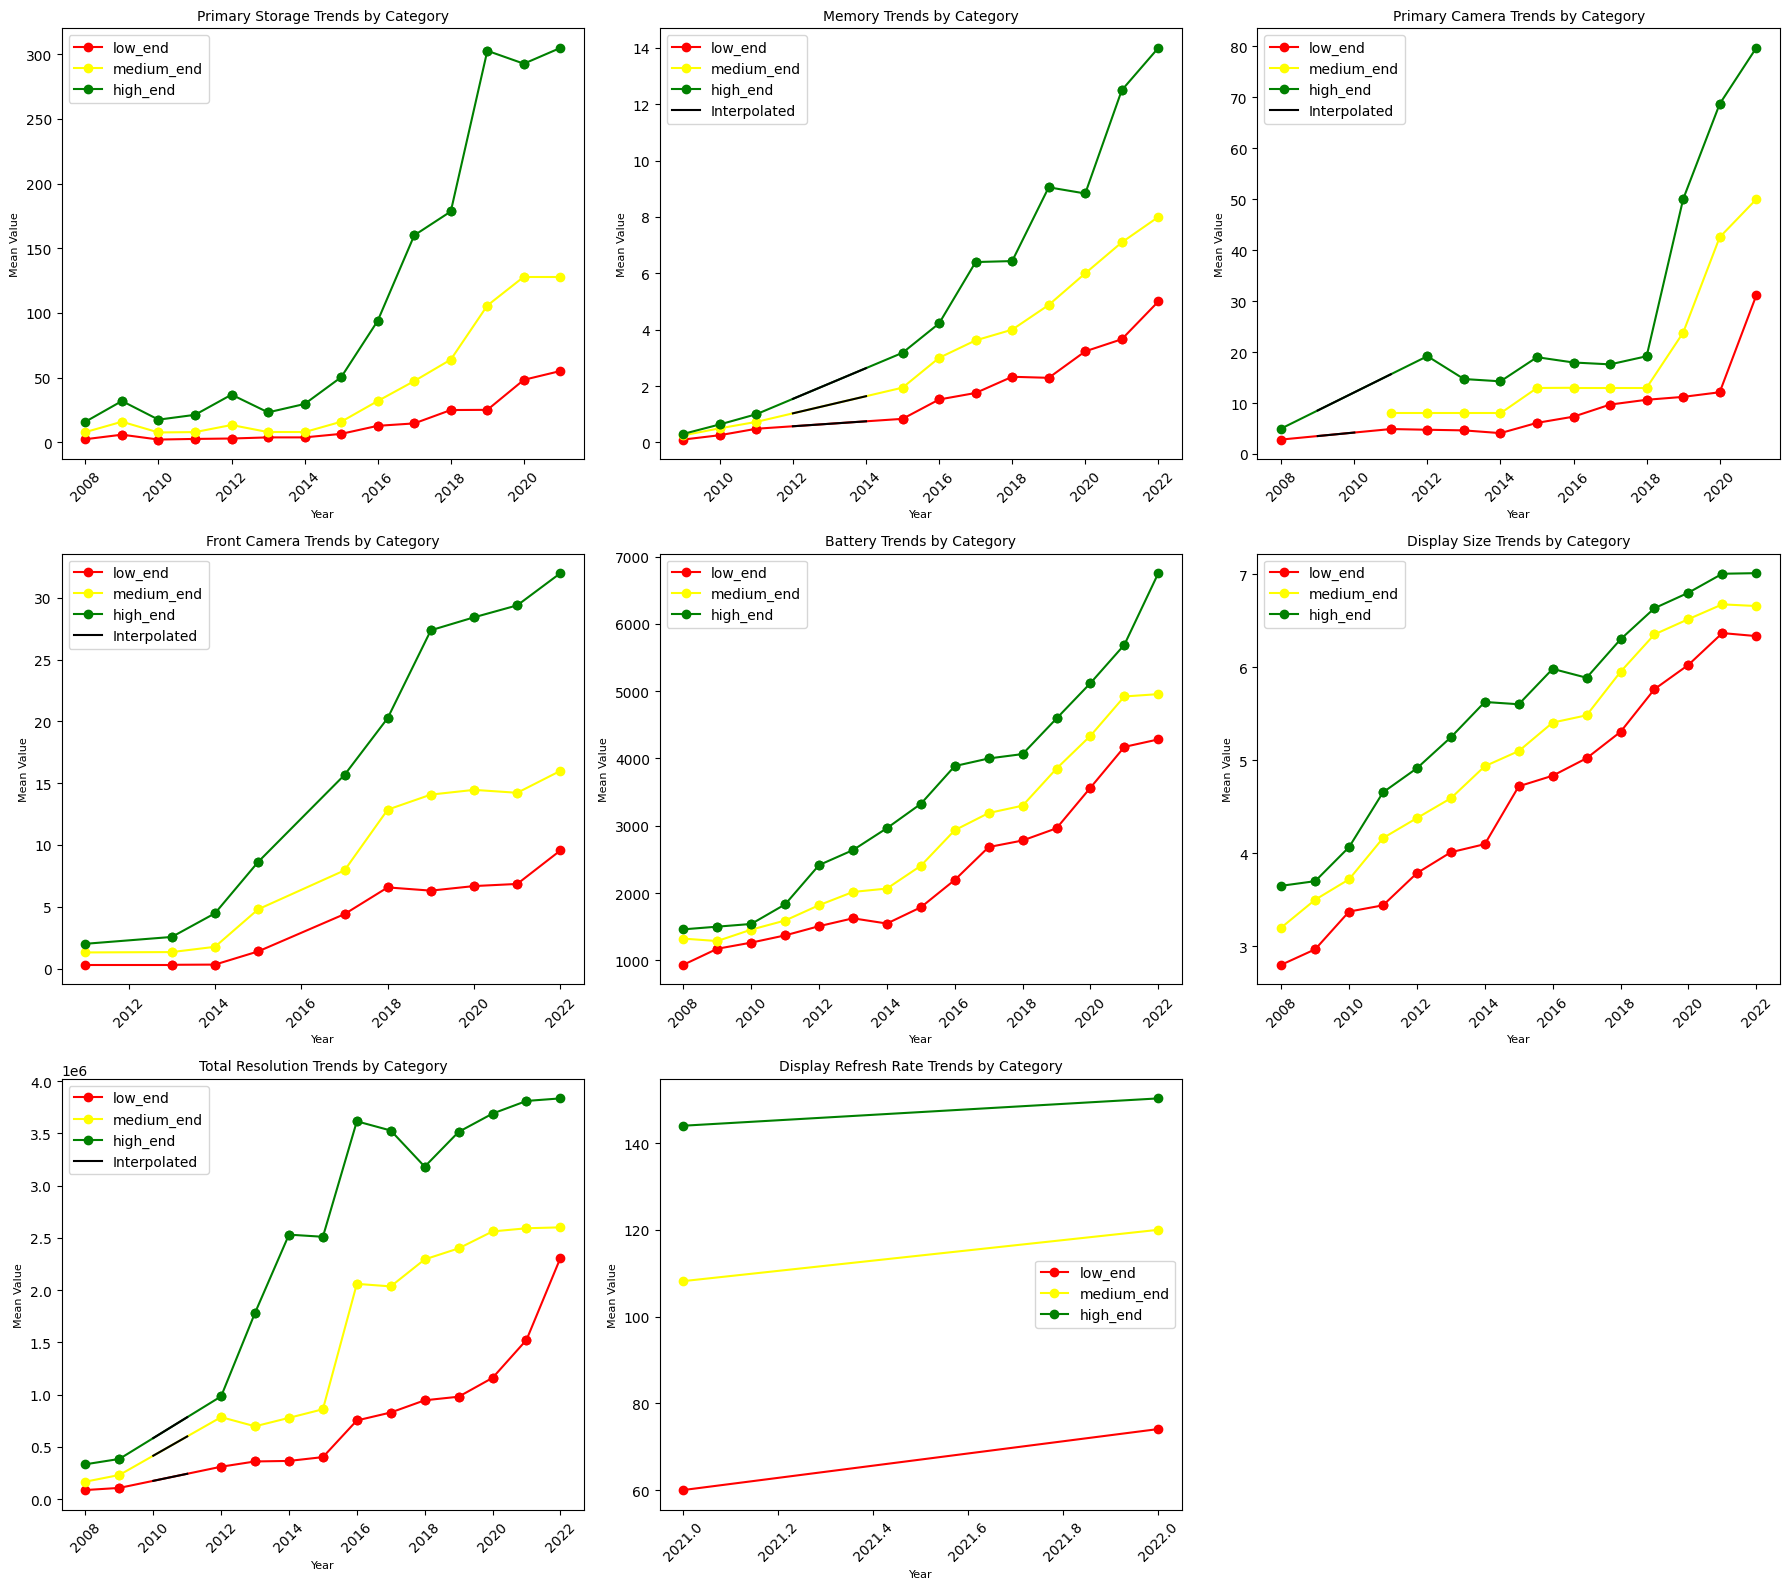


Prozentuales Wachstum für das Merkmal: Primary_Storage
 Release_Year  Primary_Storage_low_end_percent_growth  Primary_Storage_medium_end_percent_growth  Primary_Storage_high_end_percent_growth
         2008                                     NaN                                        NaN                                      NaN
         2009                                  140.00                                     100.00                                   100.00
         2010                                  -62.82                                     -51.79                                   -45.00
         2011                                   21.93                                       3.70                                    21.21
         2012                                   11.71                                      68.40                                    73.08
         2013                                   28.35                                     -40.62                    

In [ ]:
def categorize_and_calculate_means(df, features, start_year=2008, end_year=None):
    results = []
    all_years = list(range(start_year, end_year or df['Release_Year'].max() + 1))
    
    for year in all_years:  # Loop through all years, even if some are missing in the dataset
        year_data = df[df['Release_Year'] == year].copy()  # Isolate data for the year
        year_result = {'Release_Year': year}
        
        for feature in features:
            if feature not in year_data.columns or year_data[feature].nunique() < 1:
                # If feature has less than 1 unique value or doesn't exist, set means to NaN
                year_result[f'{feature}_low_end_mean'] = None
                year_result[f'{feature}_medium_end_mean'] = None
                year_result[f'{feature}_high_end_mean'] = None
                continue
            
            # Calculate 33rd and 66th percentiles
            q_low = year_data[feature].quantile(0.33)
            q_medium = year_data[feature].quantile(0.66)a
            
            # Check if the quantiles are valid
            if q_low == q_medium:
                continue  # Skip if quantiles are identical
            
            # Categorize phones into low, medium, high
            year_data[feature + '_category'] = pd.cut(
                year_data[feature],
                bins=[-float('inf'), q_low, q_medium, float('inf')],
                labels=['low_end', 'medium_end', 'high_end'],
                duplicates='drop'
            )
            
            # Calculate mean values for each category
            for category in ['low_end', 'medium_end', 'high_end']:
                mean_value = year_data[year_data[feature + '_category'] == category][feature].mean()
                year_result[f'{feature}_{category}_mean'] = mean_value
            
            # If low_end and medium_end means are the same, use the medium_end value for both
            if year_result[f'{feature}_low_end_mean'] == year_result[f'{feature}_medium_end_mean']:
                year_result[f'{feature}_low_end_mean'] = year_result[f'{feature}_medium_end_mean']
        
        results.append(year_result)  # Append results for the year
    
    # Create DataFrame and interpolate missing values
    result_df = pd.DataFrame(results).sort_values('Release_Year')
    result_df.set_index('Release_Year', inplace=True)
    interpolated_result_df = result_df.interpolate(method='linear')  # Interpolate missing values
    result_df.reset_index(inplace=True)
    interpolated_result_df.reset_index(inplace=True)
    return result_df, interpolated_result_df

# Merkmale in gewünschter Reihenfolge
hardware_features_ordered = [
    'Primary_Storage', 'Memory', 'Primary_Camera', 'Front_Camera',
    'Battery', 'Display_Size', 'Total_Resolution', 'Display_Refresh_Rate'
]

# Berechnung der Kategoriewerte
real_means_data, interpolated_means_data = categorize_and_calculate_means(cleaned_data, hardware_features_ordered, start_year=2008)

# Plot the trends
plt.figure(figsize=(18, 16))
category_colors = {'low_end': 'red', 'medium_end': 'yellow', 'high_end': 'green'}
interpolated_color = 'black'  # Set interpolated lines to solid black

# Iterate through features and plot
for i, feature in enumerate(hardware_features_ordered, start=1):
    plt.subplot(3, 3, i)
    interpolated_label_shown = False  # Track if "Interpolated" has already been added
    handles, labels = [], []  # Collect handles and labels for legend
    
    for category in ['low_end', 'medium_end', 'high_end']:
        column_name = f'{feature}_{category}_mean'
        real_timeline = real_means_data[['Release_Year', column_name]].dropna()
        interpolated_timeline = interpolated_means_data[['Release_Year', column_name]]
        
        # Plot real data points and lines
        if len(real_timeline) > 1:  # Ensure at least two points for real line
            for idx in range(1, len(real_timeline)):
                # Get start and end years of consecutive real data points
                start_year = real_timeline['Release_Year'].iloc[idx - 1]
                end_year = real_timeline['Release_Year'].iloc[idx]
                
                # Extract the real section to plot
                real_section = real_timeline[
                    (real_timeline['Release_Year'] >= start_year) & 
                    (real_timeline['Release_Year'] <= end_year)
                ]
                
                line, = plt.plot(
                    real_section['Release_Year'],
                    real_section[column_name],
                    marker='o',
                    color=category_colors[category],
                    label=f'{category} (Real)' if idx == 1 else None  # Label once
                )
                if idx == 1:  # Add to legend once
                    handles.append(line)
                    labels.append(f'{category}')
        
        # Plot interpolated lines only in gaps
        for idx in range(1, len(real_timeline)):
            # Get start and end years of the gap
            start_year = real_timeline['Release_Year'].iloc[idx - 1]
            end_year = real_timeline['Release_Year'].iloc[idx]
            
            # Get the interpolated data for the gap range
            gap_data = interpolated_timeline[
                (interpolated_timeline['Release_Year'] > start_year) & 
                (interpolated_timeline['Release_Year'] < end_year)
            ]
            
            # Plot the gap with the solid black color
            if not gap_data.empty:
                line, = plt.plot(
                    gap_data['Release_Year'],
                    gap_data[column_name],
                    linestyle='solid',  # Change from dashed to solid
                    color=interpolated_color
                )
                # Only add "Interpolated" to legend if feature is not "Front Camera"
                if not interpolated_label_shown:
                    handles.append(line)
                    labels.append('Interpolated')
                    interpolated_label_shown = True  # Mark that "Interpolated" label has been added
    
    # Add title and labels
    plt.title(f'{feature.replace("_", " ").title()} Trends by Category', fontsize=10)
    plt.xlabel('Year', fontsize=8)
    plt.ylabel('Mean Value', fontsize=8)
    plt.xticks(rotation=45)
    
    # Ensure "Interpolated" is last in legend
    if 'Interpolated' in labels:
        interpolated_idx = labels.index('Interpolated')
        handles.append(handles.pop(interpolated_idx))
        labels.append(labels.pop(interpolated_idx))
    
    # Set the legend
    if handles and labels:  # Only set legend if there's data to show
        plt.legend(handles, labels)

# Adjust layout and show
plt.tight_layout()
plt.show()


def calculate_percentage_growth(df, features):
    growth_data = df.copy()

    # Iterate through each feature
    for feature in features:
        for category in ['low_end', 'medium_end', 'high_end']:
            column_name = f'{feature}_{category}_mean'
            
            # Fill missing values with forward fill
            growth_data[column_name] = growth_data[column_name].ffill()
            
            # Calculate percentage growth for real values
            growth_data[f'{feature}_{category}_percent_growth'] = growth_data[column_name].pct_change() * 100

    # Round percentage growth columns to 2 decimal places
    growth_data = growth_data.round({col: 2 for col in growth_data.columns if '_percent_growth' in col})
    
    return growth_data

# Calculate percentage growth for all features
growth_data = calculate_percentage_growth(real_means_data, hardware_features_ordered)

# Output for each feature in a separate table with only 4 columns (Release_Year, low_end, medium_end, high_end)
for feature in hardware_features_ordered:
    # Columns for low, medium, and high percentage growth values
    growth_columns = [
        f'{feature}_low_end_percent_growth',
        f'{feature}_medium_end_percent_growth',
        f'{feature}_high_end_percent_growth'
    ]
    
    # Filter out rows where all growth values are 0.00 (indicating interpolation)
    filtered_data = growth_data[growth_data[growth_columns].ne(0).any(axis=1)]
    
    # Create the output for the feature
    print(f"\nProzentuales Wachstum für das Merkmal: {feature}")
    print(filtered_data[['Release_Year'] + growth_columns].to_string(index=False))
    print("-" * 60)  # Separator for better readability


### 3. Korrelation der Smartphone-Merkmale

**3.1. Korrelation der Smartphone-Merkmale mit Korrealtions-Matrix**  

  - **Grund:** Diese Analyse untersucht die Korrelationen zwischen verschiedenen Smartphone-Merkmalen wie `Batteriekapazität`, `Speicher`, `Arbeitsspeicher`, `Kameraauflösungen` und anderen über die Jahre hinweg. Ziel ist es, zu verstehen, welche Merkmale zusammenhängen und wie sich diese Beziehungen über die Zeit entwickeln. Eine Korrelationsmatrix hilft, die Stärke und Richtung dieser Beziehungen zu quantifizieren und zu visualisieren.

  - **Beobachtungen:**  
    1. `Release Year und andere Merkmale`: Es besteht eine starke Korrelation zwischen `Release Year` und `Display Size` (0.849) sowie `Battery` (0.803), was zeigt, dass neuere Smartphones größere Displays und leistungsstärkere Batterien haben. Auch mit `Memory` (0.715) zeigt sich, dass neuere Modelle mehr Speicher bieten. Zudem korreliert `Release Year` stark mit `Overall_category` (0.778), was darauf hindeutet, dass neuere Modelle tendenziell High-End-Geräte mit besseren technischen Spezifikationen sind.

    2. `Display Size und Batterie`: Hohe Korrelation (0.864), was darauf hinweist, dass Smartphones mit größeren Displays tendenziell auch größere Batterien brauchen.

    3. `Memory und Primary Storage`: Sehr hohe Korrelation (0.844), was darauf hinweist, dass Smartphones mit mehr Arbeitsspeicher oft auch mehr Speicherplatz für Daten bieten.

    4. `Memory und Total Resolution`: Starke Korrelation (0.765), was zeigt, dass Geräte mit mehr Arbeitsspeicher oft auch höhere Bildschirmauflösungen besitzen.

    5. `Display Size und Total Resolution`: Starke Korrelation (0.695), was zeigt, dass größere Displays in der Regel auch mit höheren Auflösungen kombiniert werden.

    6. `Primärkamera und Frontkamera`: Starke Korrelation (0.719), was auf die gleichzeitige Verbesserung der Kameraqualität auf Vorder- und Rückseite hinweist.

    7. `Primärkamera und Primary Storage`: Moderate Korrelation (0.562), was darauf hinweist, dass Geräte mit besseren Kameras tendenziell auch mehr internen Speicher bieten, möglicherweise um größere Fotos und Videos zu speichern. Diese moderate Korrelation ist jedoch unerwartet, da eine stärkere Verbindung zwischen Kameraqualität und Speicherplatz erwartet worden wäre, insbesondere angesichts der Anforderungen moderner Kameras an den Speicher. Interessanterweise weist dieser Korrelationswert die zweitgeringste Korrelation in beiden Merkmalen auf, verglichen mit deren Beziehung zu anderen Merkmalen.

    8. `Overall_category und andere Merkmale`: Starke Korrelationen mit fast allen Merkmalen außer `Display Refresh Rate`. Insbesondere hohe Werte mit `Memory` (0.843), `Battery` (0.809), `Total Resolution` (0.772), `Resolution Width` (0.845) und `Primary Storage` (0.715). Dies zeigt, dass High-End-Geräte tendenziell mit besseren technischen Spezifikationen ausgestattet sind. Die schwache Korrelation mit `Display Refresh Rate` könnte auf eine begrenzte Datenmenge oder eine geringere Priorität bei älteren Geräten hinweisen.
  
  - **Code:**

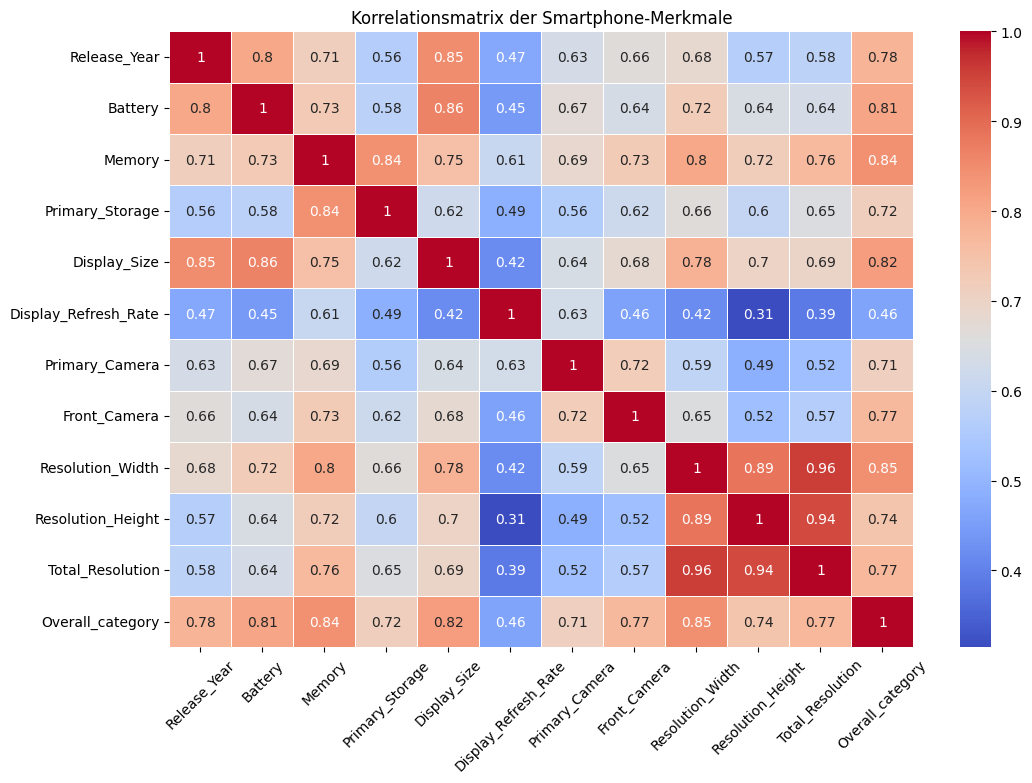

                      Release_Year   Battery    Memory  Primary_Storage  \
Release_Year              1.000000  0.803366  0.714891         0.564582   
Battery                   0.803366  1.000000  0.727104         0.578710   
Memory                    0.714891  0.727104  1.000000         0.843966   
Primary_Storage           0.564582  0.578710  0.843966         1.000000   
Display_Size              0.849277  0.864089  0.753402         0.619774   
Display_Refresh_Rate      0.470780  0.445107  0.605109         0.486556   
Primary_Camera            0.633803  0.669720  0.685836         0.562505   
Front_Camera              0.662801  0.637850  0.726223         0.615428   
Resolution_Width          0.682374  0.723662  0.803739         0.663155   
Resolution_Height         0.568180  0.643659  0.718234         0.597479   
Total_Resolution          0.581019  0.635447  0.764765         0.649604   
Overall_category          0.777980  0.809410  0.842914         0.715486   

                      Di

In [20]:
# Kopie der kategorisierten Daten erstellen
categorized_data_numeric = categorized_data.copy()

# Overall_category in numerische Werte umwandeln (1 = low_end, 2 = medium_end, 3 = high_end)
categorized_data_numeric['Overall_category'] = categorized_data_numeric['Overall_category'].map({'low_end': 0, 'medium_end': 1, 'high_end': 2})

# Nur die numerischen Spalten für die Korrelation auswählen
categorized_data_numeric = categorized_data_numeric.select_dtypes(include=['number'])

# Korrelation der numerischen Merkmale berechnen
correlation_matrix = categorized_data_numeric.corr()

# Korrelationsmatrix mit seaborn darstellen
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Titel und Achsentitel anpassen
plt.title("Korrelationsmatrix der Smartphone-Merkmale")

# X-Achsen-Titel kippen
plt.xticks(rotation=45)

# Heatmap anzeigen
plt.show()

# Ausgabe der Korrelationsmatrix in der Konsole
print(correlation_matrix)

**3.2. Scatterplots der gewählte Smartphone-Merkmale**

  - **Grund:** Diese Analyse untersucht, wie verschiedene Smartphone-Merkmale miteinander zusammenhängen. Es wird angenommen, dass Smartphones mit besseren Frontkameras mehr Speicherplatz bieten, dass Geräte mit besseren Frontkameras auch eine bessere Hauptkamera haben und dass größere Akkus in der Regel mit größeren Displays verbunden sind.

  - **Beobachtung:** 
    1. `Smartphones mit besseren Frontkameras verfügen über mehr Speicherplatz:` Die Analyse zeigt eine positive Korrelation zwischen der Qualität der Primärkamera (gemessen in Megapixeln) und dem internen Speicherplatz. Allerdings ist die Korrelation nicht sehr stark (R² = 0.305), was darauf hindeutet, dass der Zusammenhang zwischen der Qualität der Hauptkamera und dem verfügbaren Speicherplatz zwar existiert, aber nicht besonders stark ausgeprägt ist. Der Koeffizient von 1.9556 bedeutet, dass mit jedem zusätzlichen Megapixel der Hauptkamera der Speicherplatz im Durchschnitt um etwa 1.96 GB steigt. Trotz der positiven Korrelation lässt sich jedoch keine sehr hohe Übereinstimmung feststellen, was darauf hindeutet, dass Speicherplatz auch durch andere Faktoren beeinflusst wird. Es könnte auch sein, dass viele Nutzer nicht viel Wert auf die Kameraqualität legen oder wenig fotografieren. Daher könnten Smartphone-Hersteller gezielt Geräte mit größerem Speicherplatz, aber einer weniger leistungsfähigen Kamera anbieten, um die Produktionskosten zu senken und den Preis des Geräts attraktiver machen.
    
    2. `Smartphones mit besseren Frontkameras bieten auch bessere Hauptkameras:` Das Modell zeigt eine starke positive Korrelation (R² = 0.518) zwischen der Qualität der Frontkamera und der Hauptkamera. Der Koeffizient von 1.7668 zeigt, dass mit jeder Verbesserung der Frontkamera (in Megapixeln) die Qualität der Hauptkamera ebenfalls steigt, und zwar um etwa 1.77 Megapixel. Diese starke Korrelation deutet darauf hin, dass Hersteller, die in die Verbesserung der Frontkamera investieren, oft auch die Hauptkamera aufwerten, um ein ausgewogenes Kamerasystem zu bieten.
    
    3. `Größere Akkukapazität ist mit größeren Displays verbunden:` Die Untersuchung zeigt eine sehr starke positive Korrelation (R² = 0.726) zwischen der Akkukapazität und der Displaygröße. Das Modell deutet darauf hin, dass größere Bildschirme in der Regel mehr Energie benötigen und daher mit größeren Akkus ausgestattet sind. Der Koeffizient von 1123.1691 bedeutet, dass mit jeder Zunahme der Displaygröße (in Zoll) die Akkukapazität im Durchschnitt um etwa 1123 mAh steigt. Dies spiegelt die Notwendigkeit wider, die größere Energieanforderung durch größere Akkus auszugleichen, um eine akzeptable Akkulaufzeit zu gewährleisten.

  - **Code:**

Residual Standard Error für Modell 1: 60.79764207737828


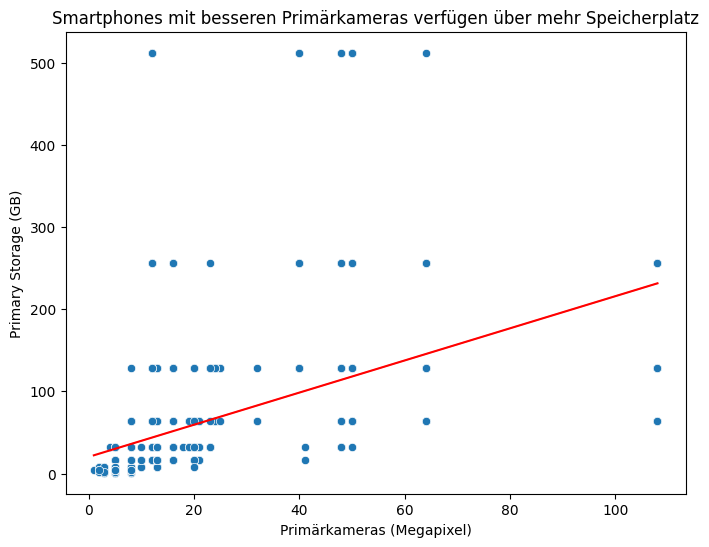

Zusammenfassung des Modells 1:
                            OLS Regression Results                            
Dep. Variable:        Primary_Storage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     758.7
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          8.67e-139
Time:                        18:44:46   Log-Likelihood:                -9571.9
No. Observations:                1732   AIC:                         1.915e+04
Df Residuals:                    1730   BIC:                         1.916e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const        

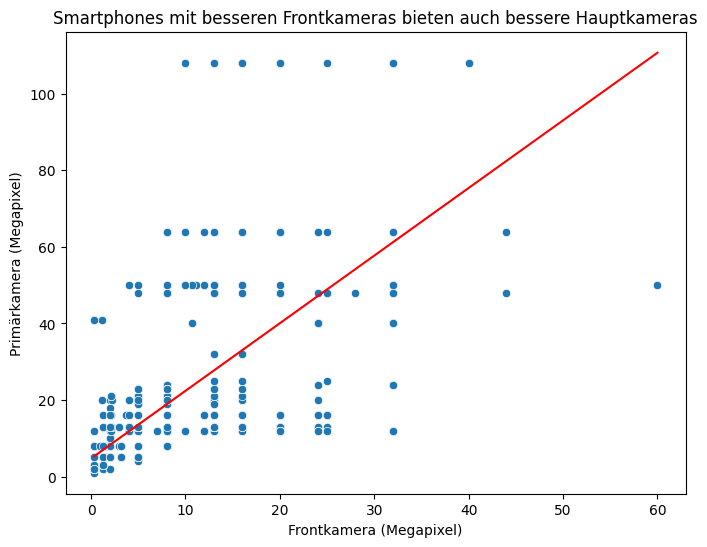

Zusammenfassung des Modells 2:
                            OLS Regression Results                            
Dep. Variable:         Primary_Camera   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     1856.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          3.75e-276
Time:                        18:44:47   Log-Likelihood:                -7065.1
No. Observations:                1732   AIC:                         1.413e+04
Df Residuals:                    1730   BIC:                         1.415e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            

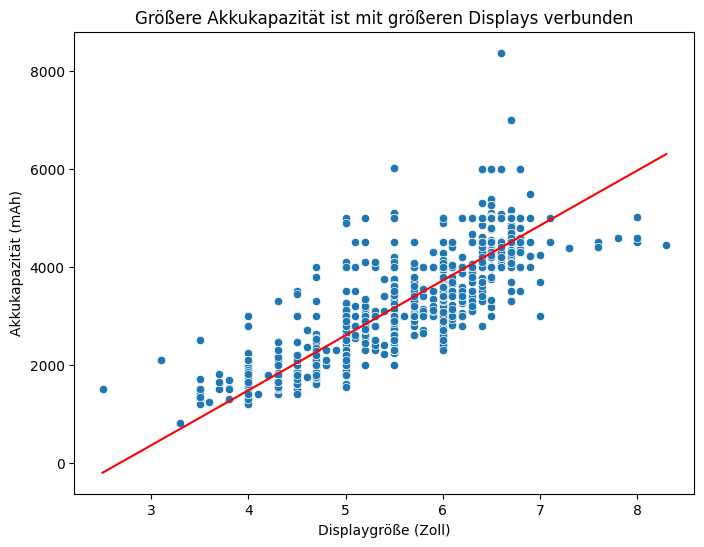

Zusammenfassung des Modells 3:
                            OLS Regression Results                            
Dep. Variable:                Battery   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     4586.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:44:47   Log-Likelihood:                -13500.
No. Observations:                1732   AIC:                         2.700e+04
Df Residuals:                    1730   BIC:                         2.701e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -301

In [21]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Bereinige die Daten, indem du NaN- und Inf-Werte entfernst
categorized_data_numeric = categorized_data_numeric.dropna(subset=['Front_Camera', 'Primary_Storage', 'Primary_Camera', 'Battery', 'Display_Size'])
categorized_data_numeric = categorized_data_numeric[~categorized_data_numeric[['Front_Camera', 'Primary_Storage', 'Primary_Camera', 'Battery', 'Display_Size']].isin([float('inf'), -float('inf')]).any(axis=1)]

# 1. Scatterplot für Primärkamera und Primary Storage
plt.figure(figsize=(8, 6))
sns.scatterplot(data=categorized_data_numeric, x='Primary_Camera', y='Primary_Storage')
plt.title('Smartphones mit besseren Primärkameras verfügen über mehr Speicherplatz')
plt.xlabel('Primärkameras (Megapixel)')
plt.ylabel('Primary Storage (GB)')

# Lineares Modell erstellen
x1 = categorized_data_numeric['Primary_Camera']
y1 = categorized_data_numeric['Primary_Storage']
x1 = sm.add_constant(x1)  # Hinzufügen eines konstanten Terms für das Modell
model1 = sm.OLS(y1, x1).fit()

# Residual Standard Error berechnen
rse1 = np.std(model1.resid)
print(f"Residual Standard Error für Modell 1: {rse1}")

# Regressionslinie zum Plot hinzufügen
sns.lineplot(x=categorized_data_numeric['Primary_Camera'], y=model1.predict(x1), color="red")
plt.show()

# Modellzusammenfassung
print("Zusammenfassung des Modells 1:")
print(model1.summary())

# 2. Scatterplot für Frontkamera und Primärkamera
plt.figure(figsize=(8, 6))
sns.scatterplot(data=categorized_data_numeric, x='Front_Camera', y='Primary_Camera')
plt.title('Smartphones mit besseren Frontkameras bieten auch bessere Hauptkameras')
plt.xlabel('Frontkamera (Megapixel)')
plt.ylabel('Primärkamera (Megapixel)')

# Lineares Modell erstellen
x2 = categorized_data_numeric['Front_Camera']
y2 = categorized_data_numeric['Primary_Camera']
x2 = sm.add_constant(x2)  # Hinzufügen eines konstanten Terms für das Modell
model2 = sm.OLS(y2, x2).fit()

# Residual Standard Error berechnen
rse2 = np.std(model2.resid)
print(f"Residual Standard Error für Modell 2: {rse2}")

# Regressionslinie zum Plot hinzufügen
sns.lineplot(x=categorized_data_numeric['Front_Camera'], y=model2.predict(x2), color="red")
plt.show()

# Modellzusammenfassung
print("Zusammenfassung des Modells 2:")
print(model2.summary())

# 3. Scatterplot für Akkukapazität und Displaygröße
plt.figure(figsize=(8, 6))
sns.scatterplot(data=categorized_data_numeric, x='Display_Size', y='Battery')
plt.title('Größere Akkukapazität ist mit größeren Displays verbunden')
plt.xlabel('Displaygröße (Zoll)')
plt.ylabel('Akkukapazität (mAh)')

# Lineares Modell erstellen
x3 = categorized_data_numeric['Display_Size']
y3 = categorized_data_numeric['Battery']
x3 = sm.add_constant(x3)  # Hinzufügen eines konstanten Terms für das Modell
model3 = sm.OLS(y3, x3).fit()

# Residual Standard Error berechnen
rse3 = np.std(model3.resid)
print(f"Residual Standard Error für Modell 3: {rse3}")

# Regressionslinie zum Plot hinzufügen
sns.lineplot(x=categorized_data_numeric['Display_Size'], y=model3.predict(x3), color="red")
plt.show()

# Modellzusammenfassung
print("Zusammenfassung des Modells 3:")
print(model3.summary())



**3.3. Multiple lineare Regression zur Vorhersage des Speichers (Hypothese 3)**

- **Grund:** Diese Analyse untersucht, ob die Qualität der Primärkamera (`Primary_Camera`) tatsächlich ein schlechter Prädiktor für den internen Speicherplatz (`Primary_Storage`) ist. Zuvor zeigte ein einfaches Regressionsmodell einen R^2-Wert von 0.305 und eine moderate Korrelation von 0.563 in der Korrelationsmatrix. Die Hypothese lautete: *Smartphones mit besseren Primärkamera verfügen über mehr Speicherplatz*. Ziel dieser Analyse ist es, mit Sicherheit zu bestätigen, ob die Primärkamera ein schlechter Prädiktor ist und, falls dies der Fall ist, herauszufinden, welche anderen Merkmale signifikant stärker mit dem Speicherplatz korrelieren.

- **Beobachtung:**  

    1. `Einfluss der Merkmale:`  
        - Der Arbeitsspeicher (`Memory`) ist der stärkste Prädiktor für den internen Speicherplatz, mit einem hohen und signifikanten Koeffizienten von `24.7270`. Dies bestätigt, dass Geräte mit mehr Arbeitsspeicher in der Regel auch mehr internen Speicherplatz haben.  
        - `Overall_category`: Moderater positiver Einfluss (`8.3736`), was darauf hindeutet, dass höherpreisige Geräte tendenziell mehr Speicher bieten.  
        - `Battery`: Negativer, aber signifikant schwacher Einfluss (`-0.0039`). Dies deutet darauf hin, dass eine größere Akkukapazität oft in Geräten mit weniger Speicherplatz vorkommt, möglicherweise aufgrund von Design- oder Marktstrategien.  
        - Andere Merkmale (`Primary_Camera`, `Front_Camera`, `Release_Year`) zeigen keinen oder nur schwachen Einfluss auf den Speicherplatz.  

    2. `Modellqualität:`  
        - Das beste Modell erreichte ein \( R^2 \)-Wert von `0.733` auf den Trainingsdaten und `0.656` auf den Testdaten, was auf eine solide, aber nicht überragende Vorhersagekraft hinweist.  
        - Der AIC-Wert (`14090`) und BIC-Wert (`14130`) zeigen, dass die Modellkomplexität moderat ist.  
        - Allerdings weist der hohe Condition Number-Wert (`4.89e+06`) auf Multikollinearität hin, was die Interpretation erschweren könnte.  

    3. `Fazit:`  
        - Die Hypothese, dass mehrere technische Spezifikationen (einschließlich Kamera- und Akkueigenschaften) den Speicherplatz präzise vorhersagen können, `wurde nicht vollständig bestätigt`.  
        - Nur `Memory` und `Overall_category` hatten signifikante Einflüsse, während andere erwartete Prädiktoren wie `Battery`, `Display_Size`, und Kameraeigenschaften nur geringe oder keine Bedeutung hatten.  
        
- **Code:**  

In [22]:
# Definierte Merkmale und Zielvariable
features = ['Release_Year', 'Battery', 'Memory', 'Display_Size', 
            'Display_Refresh_Rate', 'Primary_Camera', 'Front_Camera', 
            'Total_Resolution', 'Overall_category']
target = 'Primary_Storage'

# Datenbereinigung
categorized_data_numeric = categorized_data_numeric.dropna(subset=features + [target])
categorized_data_numeric = categorized_data_numeric[~categorized_data_numeric[features + [target]].isin([float('inf'), -float('inf')]).any(axis=1)]

# Feature- und Zielvariablen definieren
X = categorized_data_numeric[features]
y = categorized_data_numeric[target]

# Hinzufügen eines konstanten Terms
X = sm.add_constant(X)

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Full Model mit allen Merkmalen
full_model = sm.OLS(y_train, X_train).fit()
y_pred_full = full_model.predict(X_test)

print("Zusammenfassung des Modells mit allen Merkmalen:")
print(full_model.summary())
print("\nTest-R² (Full Model):", r2_score(y_test, y_pred_full))
print("MSE Testdaten (Full Model):", mean_squared_error(y_test, y_pred_full))

# 2. Testen von Kombinationen von Merkmalen
print("\nVergleich des besten Modells basierend auf Subset-Kombinationen:")
best_r2 = -float('inf')
best_combination = None
best_model = None

# Durchlaufen aller Kombinationen von Merkmalen
for L in range(1, len(features) + 1):
    for subset in itertools.combinations(features, L):
        # Subset-Daten vorbereiten
        X_subset = categorized_data_numeric[list(subset)]
        X_subset = sm.add_constant(X_subset)
        X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y, test_size=0.2, random_state=42)
        
        # Modell anpassen
        model_subset = sm.OLS(y_train_subset, X_train_subset).fit()
        y_pred_subset = model_subset.predict(X_test_subset)
        
        # Performance bewerten
        r2_test = r2_score(y_test_subset, y_pred_subset)
        mse_test = mean_squared_error(y_test_subset, y_pred_subset)
        
        # Beste Kombination aktualisieren
        if r2_test > best_r2:
            best_r2 = r2_test
            best_combination = subset
            best_model = model_subset

# 3. Bestes Modell ausgeben
print("\nBestes Modell gefunden:")
print(f"Merkmale: {best_combination}")
print("Zusammenfassung des besten Modells:")
print(best_model.summary())
print(f"\nTest-R²: {best_r2:.4f}")

Zusammenfassung des Modells mit allen Merkmalen:
                            OLS Regression Results                            
Dep. Variable:        Primary_Storage   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     422.5
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:44:47   Log-Likelihood:                -7036.3
No. Observations:                1385   AIC:                         1.409e+04
Df Residuals:                    1375   BIC:                         1.414e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

**3.4. Multiple lineare Regression zur Überprüfung von Hypothese 1**  

- **Grund:** Diese Analyse überprüft, ob die Akkukapazität (`Battery`) eines Smartphones am besten durch die Displaygröße (`Display_Size`) vorhergesagt werden kann. Ziel ist es, festzustellen, ob die Displaygröße ein bedeutender Prädiktor ist, verglichen mit anderen Merkmalen.

- **Beobachtung:**  

    1. `Einfluss der Merkmale:`  
        - `Display_Size` hat den stärksten Einfluss auf die Akkukapazität, mit einem signifikanten Koeffizienten von `669.39`. Dies bestätigt, dass größere Displays eng mit einer größeren Akkukapazität verbunden sind.  
        - `Release_Year`: Zeigt einen moderaten positiven Effekt (`59.82`), was darauf hindeutet, dass neuere Geräte tendenziell größere Akkus haben.  
        - `Primary_Camera`: Leichter positiver Einfluss (`5.85`), möglicherweise durch Korrelation mit anderen High-End-Merkmalen.  
        - `Overall_category`: Moderater positiver Einfluss (`330.75`), was zeigt, dass teurere Geräte oft größere Akkus haben.  
        - `Front_Camera`: Überraschend ist der Einfluss negativ (`-10.00`), was auf Korrelationen oder andere Effekte hinweisen könnte.  

    2. `Modellqualität:`  
        - R^2: `0.777` (Trainingsdaten) und R^2_Test: `0.7404` zeigen eine hohe Vorhersagekraft des Modells.  
        - Der AIC-Wert (`21290`) und BIC-Wert (`21320`) sind relativ niedrig und zeigen eine gute Balance zwischen Modellkomplexität und Anpassung.  
        - Die hohe Condition Number (`2.64e+06`) deutet jedoch auf Multikollinearität hin, d. h. einige Features könnten stark miteinander korrelieren und die Stabilität des Modells beeinflussen.  

    3. `Fazit:`  
        - Die Ergebnisse bestätigen Hypothese 1: Smartphones mit größeren Displays haben tendenziell größere Akkus.  
        - `Display_Size` ist der wichtigste Prädiktor, aber mögliche Multikollinearitätsprobleme sollten weiter untersucht werden, um die Stabilität und Interpretierbarkeit des Modells zu verbessern. 

- **Code:**  

In [23]:
# Hypothese 1: Features und Ziel
features_hyp1 = ['Release_Year', 'Memory', 'Display_Size', 
                 'Display_Refresh_Rate', 'Primary_Camera', 
                 'Front_Camera', 'Total_Resolution', 'Overall_category']
target_hyp1 = 'Battery'

# Daten vorbereiten
X_hyp1 = categorized_data_numeric[features_hyp1]
y_hyp1 = categorized_data_numeric[target_hyp1]

# Beste Kombination suchen
best_r2_hyp1 = -float('inf')
best_combination_hyp1 = None
best_model_hyp1 = None

for L in range(1, len(features_hyp1) + 1):  # Teste alle möglichen Kombinationen von Features
    for subset in itertools.combinations(features_hyp1, L):
        # Subset-Daten vorbereiten
        X_subset = categorized_data_numeric[list(subset)]
        X_subset = sm.add_constant(X_subset)
        
        # Aufteilen in Trainings- und Testdaten
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y_hyp1, test_size=0.2, random_state=42)
        
        # Modell anpassen
        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_test)
        
        # Test-R^2 bewerten
        r2_test = r2_score(y_test, y_pred)
        
        # Beste Kombination aktualisieren
        if r2_test > best_r2_hyp1:
            best_r2_hyp1 = r2_test
            best_combination_hyp1 = subset
            best_model_hyp1 = model

# Ergebnisse ausgeben
print("Beste Kombination für Hypothese 1:")
print(f"Features: {best_combination_hyp1}")
print(best_model_hyp1.summary())
print(f"Bestes Test-R²: {best_r2_hyp1:.4f}")

Beste Kombination für Hypothese 1:
Features: ('Release_Year', 'Display_Size', 'Primary_Camera', 'Front_Camera', 'Overall_category')
                            OLS Regression Results                            
Dep. Variable:                Battery   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     958.7
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:44:50   Log-Likelihood:                -10640.
No. Observations:                1385   AIC:                         2.129e+04
Df Residuals:                    1379   BIC:                         2.132e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      

**3.5. Multiple lineare Regression zur Überprüfung von Hypothese 2**  

  - **Grund:** Diese Analyse überprüft, ob die Qualität der Hauptkamera (`Primary_Camera`) durch die Qualität der Frontkamera (`Front_Camera`) vorhergesagt werden kann. Ziel ist es, die Frontkamera mit anderen möglichen Einflussfaktoren zu vergleichen.

  - **Beobachtung:**  
  
      1. `Einfluss der Merkmale:`  
          - `Front_Camera` ist der stärkste Prädiktor für die Hauptkameraqualität, mit einem signifikanten Koeffizienten von `0.8357`. Dies bestätigt eine starke positive Korrelation zwischen der Qualität von Front- und Hauptkameras.  
          - `Display_Refresh_Rate`: Positiver Effekt (`0.3928`), was zeigt, dass Smartphones mit höherer Bildwiederholrate tendenziell auch bessere Hauptkameras haben.  
          - `Battery`: Positiver, aber schwacher Einfluss (`0.0029`).  
          - `Overall_category`: Moderater positiver Effekt (`6.2330`).  
          - `Total_Resolution` hat einen kleinen, aber signifikant negativen Effekt (`-9.07e-07`), was auf eine nichtlineare Beziehung oder Multikollinearität hinweisen könnte.  
          - `Release_Year` und `Memory` zeigen keine signifikanten Einflüsse.  

      2. `Modellqualität:`  
          - R^2: `0.675` (Trainingsdaten) und R^2_Test: `0.6753` deuten auf eine solide Vorhersagekraft hin.  
          - Der hohe Condition Number-Wert (`2.62e+09`) deutet jedoch auf starke Multikollinearität hin, die die Interpretation der Koeffizienten erschweren könnte.  

      3. `Fazit:`  
          - Die Ergebnisse unterstützen Hypothese 2, dass bessere Frontkameras oft mit besseren Hauptkameras einhergehen. Dennoch könnten Multikollinearitätsprobleme die Modellstabilität beeinflussen. Eine genauere Prüfung oder Reduktion der Features könnte sinnvoll sein.

  - **Code:**  

In [24]:
# Hypothese 2: Features und Ziel
features_hyp2 = ['Release_Year', 'Battery', 'Memory', 'Display_Size', 
                 'Display_Refresh_Rate', 'Front_Camera', 
                 'Total_Resolution', 'Overall_category']
target_hyp2 = 'Primary_Camera'

# Daten vorbereiten
X_hyp2 = categorized_data_numeric[features_hyp2]
y_hyp2 = categorized_data_numeric[target_hyp2]

# Beste Kombination suchen
best_r2_hyp2 = -float('inf')
best_combination_hyp2 = None
best_model_hyp2 = None

for L in range(1, len(features_hyp2) + 1):  # Teste alle möglichen Kombinationen von Features
    for subset in itertools.combinations(features_hyp2, L):
        # Subset-Daten vorbereiten
        X_subset = categorized_data_numeric[list(subset)]
        X_subset = sm.add_constant(X_subset)
        
        # Aufteilen in Trainings- und Testdaten
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y_hyp2, test_size=0.2, random_state=42)
        
        # Modell anpassen
        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_test)
        
        # Test-R^2 bewerten
        r2_test = r2_score(y_test, y_pred)
        
        # Beste Kombination aktualisieren
        if r2_test > best_r2_hyp2:
            best_r2_hyp2 = r2_test
            best_combination_hyp2 = subset
            best_model_hyp2 = model

# Ergebnisse ausgeben
print("Beste Kombination für Hypothese 2:")
print(f"Features: {best_combination_hyp2}")
print(best_model_hyp2.summary())
print(f"Bestes Test-R²: {best_r2_hyp2:.4f}")


Beste Kombination für Hypothese 2:
Features: ('Release_Year', 'Battery', 'Memory', 'Display_Refresh_Rate', 'Front_Camera', 'Total_Resolution', 'Overall_category')
                            OLS Regression Results                            
Dep. Variable:         Primary_Camera   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     407.8
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:44:51   Log-Likelihood:                -5377.6
No. Observations:                1385   AIC:                         1.077e+04
Df Residuals:                    1377   BIC:                         1.081e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err     

**3.6. Modell zur Vorhersage der Smartphone-Kategorie**

  - **Grund:** In diesem Abschnitt werden wir ein Modell erstellen, das vorhersagen kann, ob ein Smartphone als Low-End, Mid-End oder High-End eingestuft wird. Diese Klassifizierung basiert auf verschiedenen Merkmalen wie Preis, Prozessor, Speicher und anderen technischen Spezifikationen. Das Ziel ist es, ein Klassifikationsmodell zu entwickeln, das diese Kategorien genau vorhersagen kann.

  - **Beobachtung:** Die Ergebnisse zeigen, dass das Modell eine sehr hohe Leistungsfähigkeit aufweist. Der durchschnittliche Kreuzvalidierungs-Genauigkeitswert beträgt 98,48 %, und die Genauigkeit auf dem Testdatensatz liegt bei 99,14 %. Die Precision, Recall und F1-Score für alle Klassen sind nahezu perfekt, was darauf hindeutet, dass das Modell die Kategorien Low-End, Mid-End und High-End sehr zuverlässig vorhersagen kann.

In [27]:
# Features and target variable
features = ['Release_Year', 'Battery', 'Memory', 'Primary_Storage', 'Display_Size', 
            'Display_Refresh_Rate', 'Primary_Camera', 'Front_Camera', 
            'Resolution_Width', 'Resolution_Height', 'Total_Resolution']
target = 'Overall_category'

# Data separation
X = categorized_data_numeric[features]
y = categorized_data_numeric[target]

# Split data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)

# Set up k-fold cross-validation on the training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train_full, cv=kf, scoring='accuracy')

# Train the model on the full training set
xgb_model.fit(X_train_scaled, y_train_full)

# Evaluate on the test set
y_pred = xgb_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")
print(f"Test set accuracy: {test_accuracy:.4f}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.97111913 0.98555957 0.99277978 0.99277978 0.98194946]
Mean cross-validation accuracy: 0.9848
Test set accuracy: 0.9914

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       122
           1       0.99      0.99      0.99       136
           2       0.99      0.99      0.99        89

    accuracy                           0.99       347
   macro avg       0.99      0.99      0.99       347
weighted avg       0.99      0.99      0.99       347



## **Fazit**  

#### **Hypothese 1: Größere Akkukapazität ist mit größeren Displays verbunden.**  

**Ergebnisse:**  
- **Analyse (Kapitel 3.1, 3.2, 3.4):**  
  In den Kapiteln 3.1 und 3.2 zeigte die Korrelationsanalyse eine moderate positive Korrelation zwischen `Battery` und `Display_Size` (r = 0.54), was darauf hindeutet, dass größere Displays oft mit größeren Akkus verbunden sind. Darüber hinaus bestätigte die multiple lineare Regression in Kapitel 3.4, dass `Display_Size` der stärkste Prädiktor für die Akkukapazität war, mit einem signifikanten Koeffizienten von `669.39`.  
- **Interpretation:**  
  Der Zusammenhang zwischen der Displaygröße und der Akkukapazität verdeutlicht, dass größere Displays mehr Energie benötigen, weshalb größere Akkus erforderlich sind, um den Energiebedarf zu decken. Die Ergebnisse aus Kapitel 3.4 zeigen, dass `Display_Size` der wichtigste Prädiktor für `Battery` ist, was die Hypothese weiter unterstützt.  

**Schlussfolgerung:**  
Die Hypothese wird `bestätigt`. Smartphones mit größeren Displays tendieren dazu, größere Akkus zu haben, um den höheren Energiebedarf des größeren Bildschirms zu decken.  

---

#### **Hypothese 2: Smartphones mit besseren Frontkameras bieten auch bessere Hauptkameras.**  

**Ergebnisse:**  
- **Analyse (Kapitel 3.1, 3.2, 3.5):**  
  In den Kapiteln 3.1 und 3.2 zeigten die Korrelations- und Regressionsanalysen eine starke positive Korrelation zwischen `Front_Camera` und `Primary_Camera` (r = 0.79). Darüber hinaus wurde in Kapitel 3.5 die multiple lineare Regression durchgeführt, wobei `Front_Camera` als stärkster Prädiktor für `Primary_Camera` identifiziert wurde, mit einem signifikanten Koeffizienten von `0.8357`. Diese Ergebnisse verdeutlichen, dass Smartphones mit besseren Frontkameras tendenziell auch eine bessere Hauptkamera haben.  
- **Interpretation:**  
  Die starke Korrelation und die signifikante Vorhersagekraft von `Front_Camera` für die `Primary_Camera` bestätigen die Annahme, dass Hersteller bei Smartphones mit hochwertigen Frontkameras auch die Hauptkamera entsprechend verbessern.  

**Schlussfolgerung:**  
Die Hypothese wird `bestätigt`. Smartphones mit besseren Frontkameras bieten tendenziell auch bessere Hauptkameras, was den Trend zu hochwertigen Fotografie- und Selfie-Funktionen verstärkt.  

---

#### **Hypothese 3: Smartphones mit besseren Primärkameras verfügen über mehr Speicherplatz.**  

**Ergebnisse:**  
- **Analyse (Kapitel 3.1, 3.2, 3.3):**  
  In den Kapiteln 3.1 und 3.2 zeigte die Korrelationsanalyse eine moderate Korrelation von 0.563 zwischen `Primary_Camera` und `Primary_Storage`. Jedoch ergab die multiple lineare Regression in Kapitel 3.3, dass `Primary_Camera` nur einen minimalen Einfluss auf den `Primary_Storage` hatte, während der Arbeitsspeicher (`Memory`) mit einem signifikanten Koeffizienten von `24.7270` der stärkste Prädiktor für den Speicherplatz war. Weitere Merkmale wie `Overall_category` und `Battery` hatten ebenfalls einen moderaten Einfluss auf den Speicherplatz.  
- **Interpretation:**  
  Die schwache Korrelation und der minimale Einfluss der `Primary_Camera` auf den Speicherplatz legen nahe, dass Smartphones mit besseren Kameras häufig auch andere technische Merkmale wie größeren Arbeitsspeicher und höhere Geräteklassen bieten, was den größeren Speicherplatz erklärt. Die Hypothese, dass bessere Kameras direkt mit mehr Speicherplatz verbunden sind, konnte nicht eindeutig bestätigt werden.  

**Schlussfolgerung:**  
Die Hypothese wird `nicht bestätigt`. Es gibt einen gewissen Zusammenhang zwischen besseren Kameras und mehr Speicherplatz, jedoch nicht direkt durch die Kamera. Vielmehr sind Geräte mit besserer Kamera oft höherwertige Modelle, die auch mehr Speicherplatz bieten, was auf die allgemeine Ausstattung der Geräte zurückzuführen ist.  

---

#### **Hypothese 4: Wichtige technische Merkmale haben sich in allen Leistungskategorien über die Jahre verbessert.**  

**Ergebnisse:**  
- **Analyse (Kapitel 2.6, 2.7):**  
  - In allen Kategorien (Low-End, Mid-Range, High-End) zeigen sich klare Trends zu größeren Displays, verbesserten Kameras und höheren Akkukapazitäten.  
  - Spezifikationen wie `Memory` und `Battery` haben in allen Kategorien signifikante Fortschritte gemacht.  

**Schlussfolgerung:**  
Die Hypothese wird `bestätigt`. Alle Leistungskategorien zeigen eine deutliche Verbesserung wichtiger technischer Merkmale, was die allgemeine technologische Weiterentwicklung widerspiegelt.  

---

#### **Hypothese 5: High-End-Smartphones haben in den letzten Jahren ein langsameres Wachstum gezeigt als Low-End-Smartphones.**

**Ergebnisse:**  
- `Gesamtauflösung:` Low-End-Geräte zeigten größere Wachstumsraten in den letzten Jahren, von `+28,7% (2018)` auf `+51,49% (2022)`, während High-End-Geräte im selben Zeitraum von `+3,2%` auf `+0,64%` fielen.  
- `Displaygröße:` Wachstum nahezu stabil in allen Kategorien. High-End-Geräte wuchsen um `+0,09% (2022)`, ähnlich wie `+0,14% (2018)`. Low-End-Geräte verzeichneten sogar einen Rückgang (`-0,51% (2022)`).  
- `Batteriegröße:` High-End-Geräte wuchsen zuletzt stärker, von `+12,3% (2018)` auf `+18,69% (2022)`, während Low-End-Geräte von `+14,8%` auf `+8,4%` zurückgingen.  

**Schlussfolgerung:**  
Die Hypothese wird `teilweise bestätigt`. Low-End-Geräte wiesen bei der Gesamtauflösung größere Wachstumsraten auf, während High-End-Geräte bei der Batteriekapazität stärker zulegten.